<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Gesti칩n de Outliers

AutoRenew, la empresa l칤der en la venta de coches de segunda mano, sigue adelante con el desarrollo del modelo predictivo que ayudar치 a estimar el precio de los veh칤culos usados. Este modelo es clave para mejorar las estrategias de ventas, marketing y optimizaci칩n del inventario de la empresa. Ya has realizado un an치lisis exploratorio inicial y gestionado los valores nulos en el conjunto de datos. Ahora, es el momento de abordar otro aspecto crucial del preprocesamiento: la **gesti칩n de outliers**.

En este laboratorio, te enfocar치s en identificar y gestionar los outliers (valores at칤picos) presentes en el conjunto de datos. Los outliers pueden distorsionar los resultados de un an치lisis y afectar negativamente el rendimiento de los modelos predictivos, por lo que es fundamental tratarlos adecuadamente antes de proceder con las siguientes fases del proyecto.


**Instrucciones:**

1. **Identificaci칩n de Outliers:** Explora las columnas clave del conjunto de datos (como `price`, `powerCV`, `kilometer`, etc.) para identificar posibles outliers. Utiliza gr치ficos como diagramas de caja (boxplots) y an치lisis estad칤sticos para detectar valores que se desv칤en significativamente del resto de los datos.

2. **An치lisis de Outliers:** Una vez identificados, analiza los outliers para determinar si son errores de datos, valores extremos v치lidos o resultados de condiciones espec칤ficas que deben ser tenidos en cuenta. Considera el contexto de cada columna al evaluar la relevancia de estos valores at칤picos.

3. **Gesti칩n de Outliers:** Decide la estrategia m치s adecuada para manejar los outliers. Esto podr칤a incluir la eliminaci칩n de los outliers, la transformaci칩n de los datos, o la aplicaci칩n de t칠cnicas de imputaci칩n. Justifica tu elecci칩n bas치ndote en c칩mo los outliers podr칤an afectar el modelo predictivo.

**Nota:** Recuerda que este laboratorio es parte de una serie de actividades en las que utilizar치s el mismo conjunto de datos a lo largo de la semana. Documenta cuidadosamente los pasos que sigas para que puedas referirte a ellos en las pr칩ximas etapas del proyecto.


---

### **Importante**

En el an치lisis exploratorio inicial ya hab칤amos hecho una gesti칩n de algunos outliers que hab칤amos considerado errores en nuestro conjunto de datos. Sin embargo, proseguiremos igualmente con los datos que tenemos por si queremos llevar a cabo alguna gesti칩n adicional

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gr치ficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


# M칠todos estad칤sticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el m칠todo LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product, combinations

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

from src.soporte_outliers import GestionOutliersMultivariados, GestionOutliersUnivariados

In [3]:
df = pd.read_csv('datos/autorenew_knn_escalado.csv', index_col=0)

# Por si acaso, aunque no hace nada aqu칤
df.reset_index(drop=True, inplace=True)

# Como algunas variables se cargan como num칠ricas las devolvemos a objeto
df['monthOfRegistration'] = df['monthOfRegistration'].astype(object)

### Identificaci칩n visual

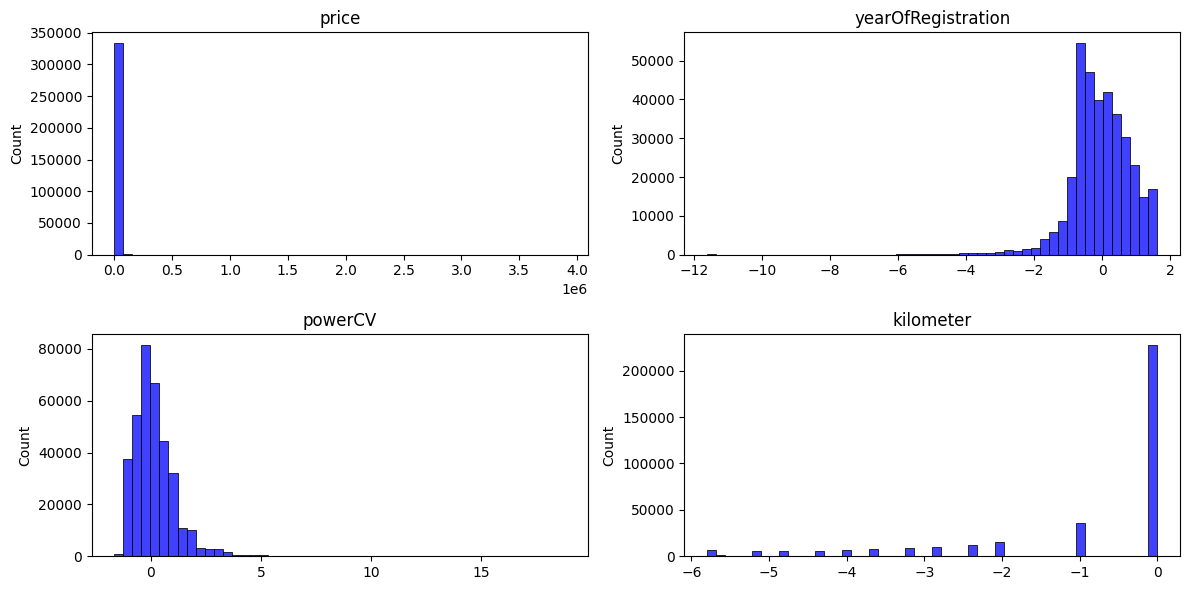

In [4]:
# Instanciamos la clase que nos permite identificar y gestionar outliers
gestion = GestionOutliersUnivariados(df)

# Llamamos al m칠todo que nos permite identificar outliers univariados de forma visual (hist)
gestion.visualizar_outliers_univariados(tipo_grafica="H", tamano_grafica=(12, 6))

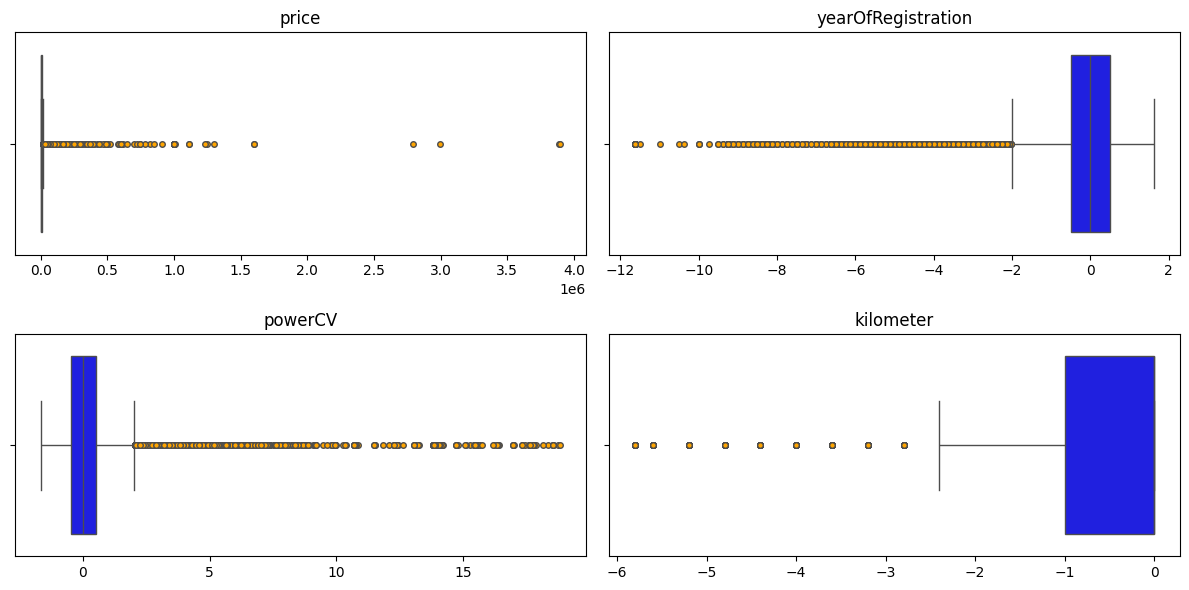

In [5]:
# Llamamos al m칠todo que nos permite identificar outliers univariados de forma visual (boxplot)
gestion.visualizar_outliers_univariados(tipo_grafica="B", tamano_grafica=(12, 6))

Vemos que tenemos una distribuci칩n de outliers similar a la vista en el an치lisis exploratorio. Hay muchos outliers en todas las categor칤as num칠ricas debido a la distribuci칩n asim칠trica de las mismas:

* `Precio`: La mayor칤a de veh칤culos de segunda mano son "baratos" pero puede haber algunas entradas que se correspondan con veh칤culos de lujo que pueden tener un precio superior.

* `A침o`: La mayor칤a de veh칤culos se corresponden con las 칰ltimas d칠cadas, sin embargo pueden existir en el mercado algunos modelos hist칩ricos que tengan m치s antig칲edad. Como el l칤mite es el presente, ya que no puede haber veh칤culos del futuro (de momento 游땔).

* `Potencia`: La mayor칤a de veh칤culos tienen una potencia est치ndar, pero algunos modelos pueden ser m치s potentes por ser veh칤culos deportivos de lujo u otro tipos de veh칤culos de mayor tama침o.

* `Kil칩metros`: En este caso ya hab칤amos concluido que las entradas est치n agrupadas seg칰n ciertos valores discretos. La mayor칤a de veh칤culos est치n etiquetados con los n칰meros de kil칩metros m치s altos, aunque hay algunas excepciones, que se corresponden con las entradas discretas que podemos ver en el diagrama.

---

### Identificaci칩n mediante IQR

In [6]:
outliers_iqr = gestion.detectar_outliers_iqr()

La cantidad de outliers que tenemos para la columna PRICE es 25568
La cantidad de outliers que tenemos para la columna YEAROFREGISTRATION es 7352
La cantidad de outliers que tenemos para la columna POWERCV es 13149
La cantidad de outliers que tenemos para la columna KILOMETER es 60922


In [7]:
df.shape[0]

352487

Como hemos visto en los histogramas y boxplot las distribuciones no son normales por lo que no tiene mucho sentido hacer un zscore

---

### Outliers multivariados

Vamos a hacer un an치lisis multivariado de los outliers para ver si podemos sacar alguna conclusi칩n adicional.

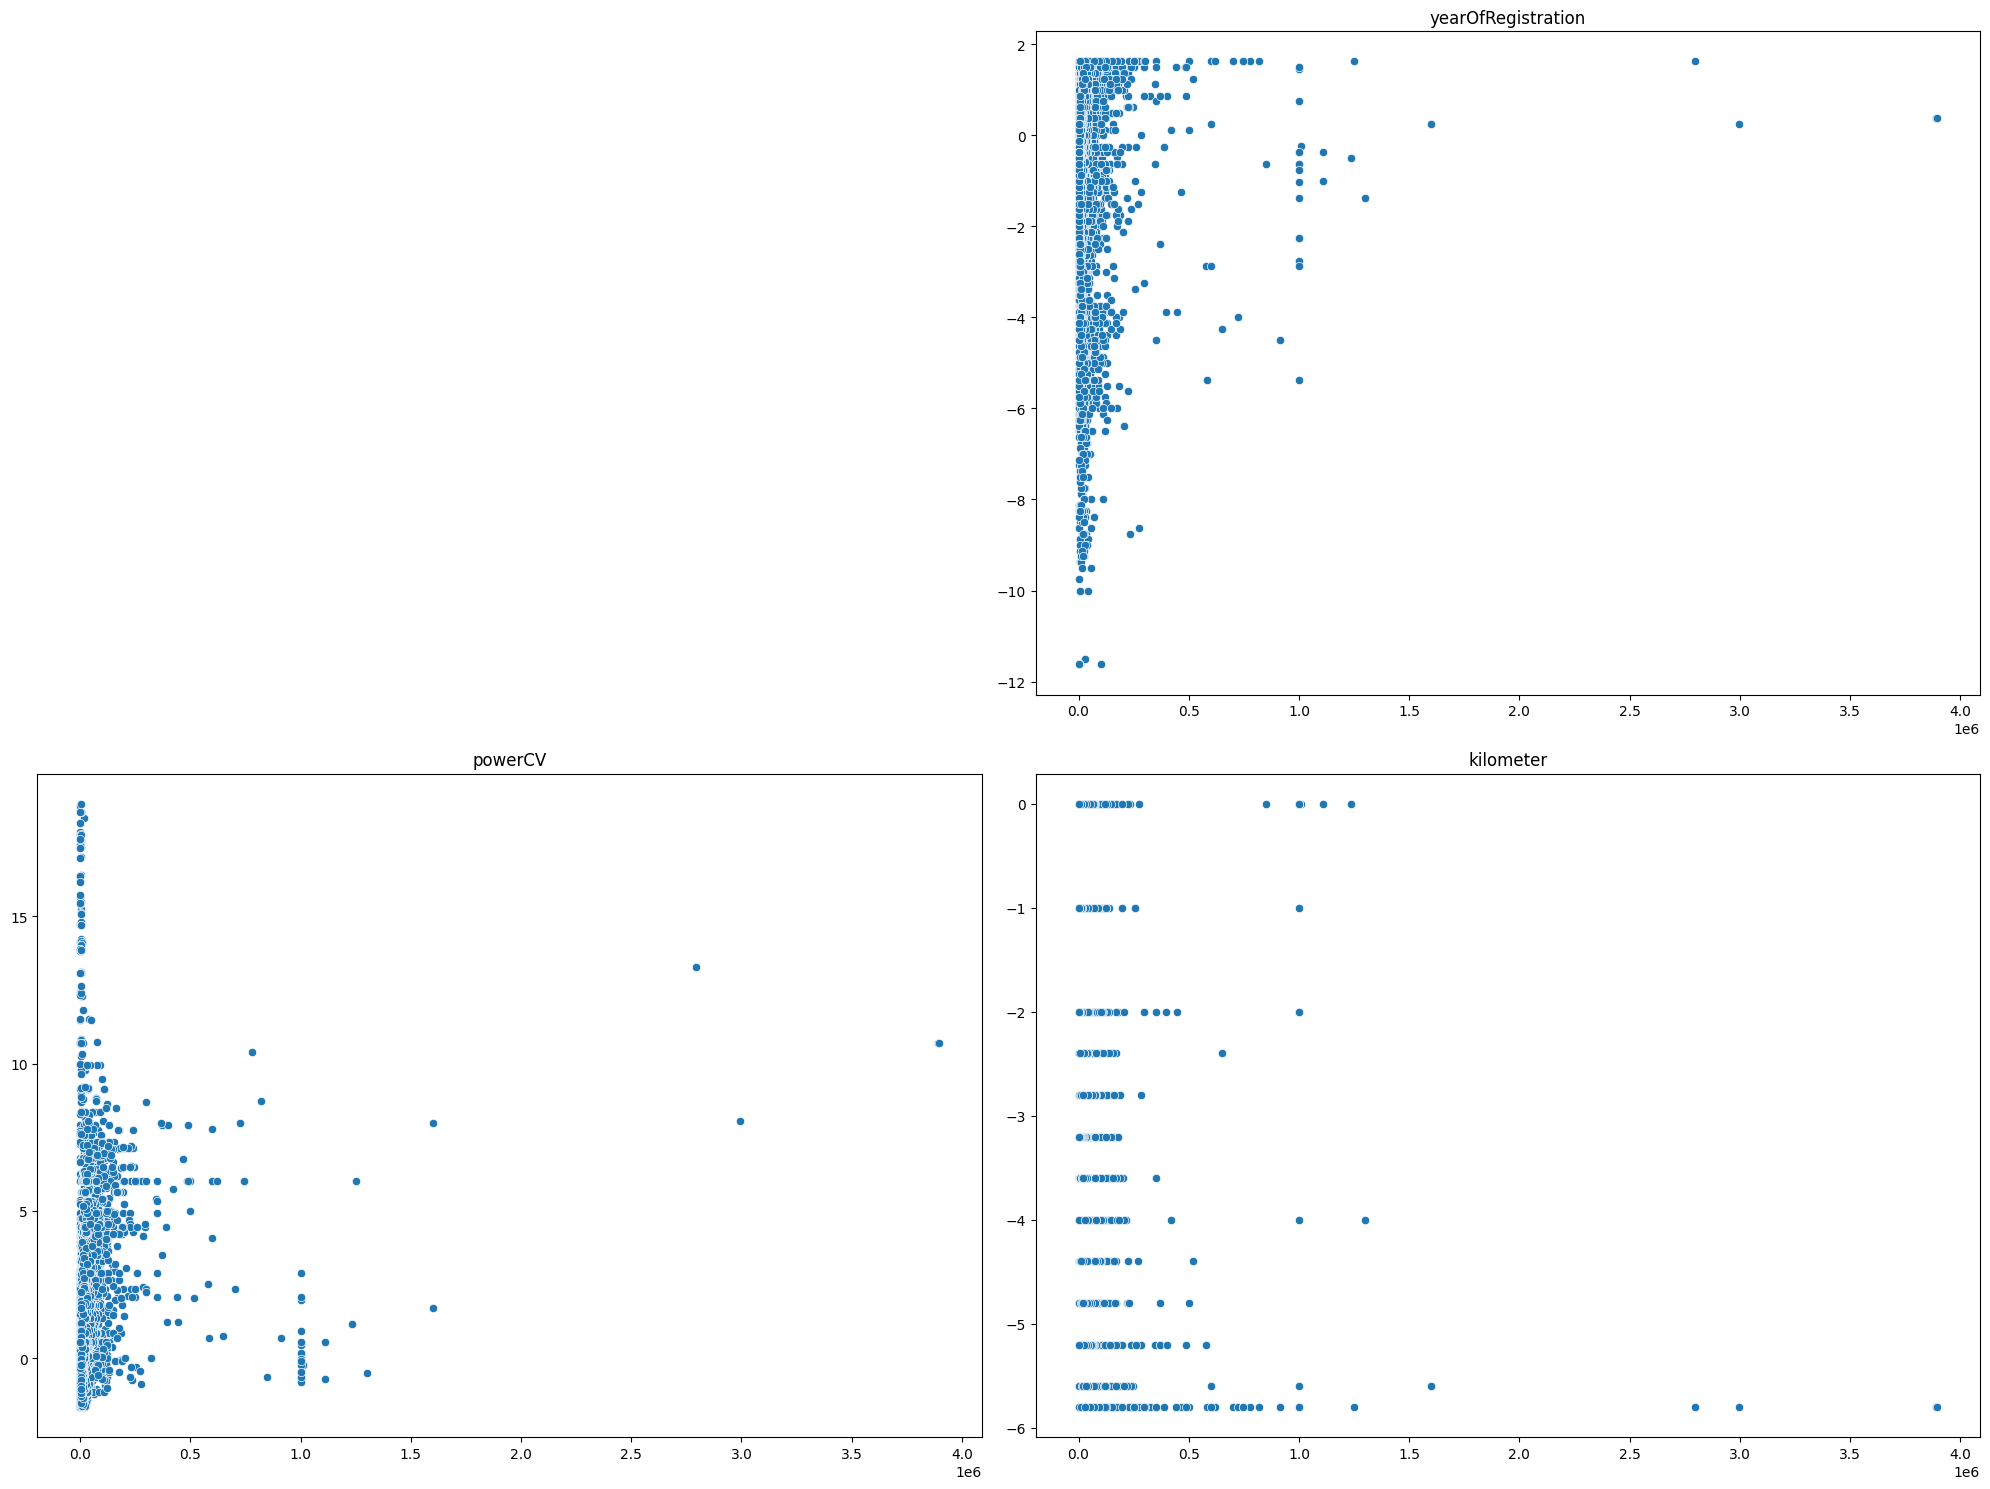

In [8]:
# Instanciamos la clase de indentificaci칩n de Outliers Multivariados
gestion_multi= GestionOutliersMultivariados(df)

# Llamamos al m칠todo que nos permite identificar los outliers
gestion_multi.visualizar_outliers_bivariados("price")

* Los valores at칤picos de `powerCV` se acumulan en el rango de precios bajo, lo cual puede ser indicativo de presencia de veh칤culos de mayor tama침o o m치s potentes y no necesariamente de lujo. Por su parte los at칤picos de `price` s칤 se distribuyen en un gran rango de potencias excluyendo valores elevados, lo cual puede sugerir datos err칩neos o bien veh칤culos de lujo sin una potencia extraordinaria.

* En el caso de los `kilometer` s칤 parece que los veh칤culos m치s caros tienen menos km, salvo valores aislados que podr칤amos considerar verdaderamente at칤picos, ya que es raro que un veh칤culo de segunda mano muy caro tenga muchos kil칩metros. Sin embargo, podr칤a tratarse de veh칤culos de lujo hist칩ricos o de coleccionismo.

* De todas formas, en el `yearOfRegistration` comprobamos que los precios extremadamente altos se corresponden con coches m치s nuevos, mientras que los excesivamente antiguos no poseen entradas de precios elevadas, lo cual debilita la suposici칩n anterior.

---

Como no podemos tener nulos, vamos a hacer el an치lisis filtrando sus entradas de la variable respuesta. Recordemos que el precio no ten칤a nulos pero hab칤amos establecido un criterio para valores que no ten칤an sentido, es decir, ya hab칤amos hecho una gesti칩n manual de outliers en el EDA teniendo en cuenta el contexto del problema.

Considerando esto, simplemente vamos a eliminar esos nulos introducidos artificialmente ya que son valores err칩neos que no queremos que contaminen nuestro posterior an치lisis.

In [9]:
df.dropna(subset=['price'], inplace=True)

### Local outlier factor

In [10]:
indice_contaminacion=[0.01, 0.05, 0.1]
vecinos=[30, 60, 80]

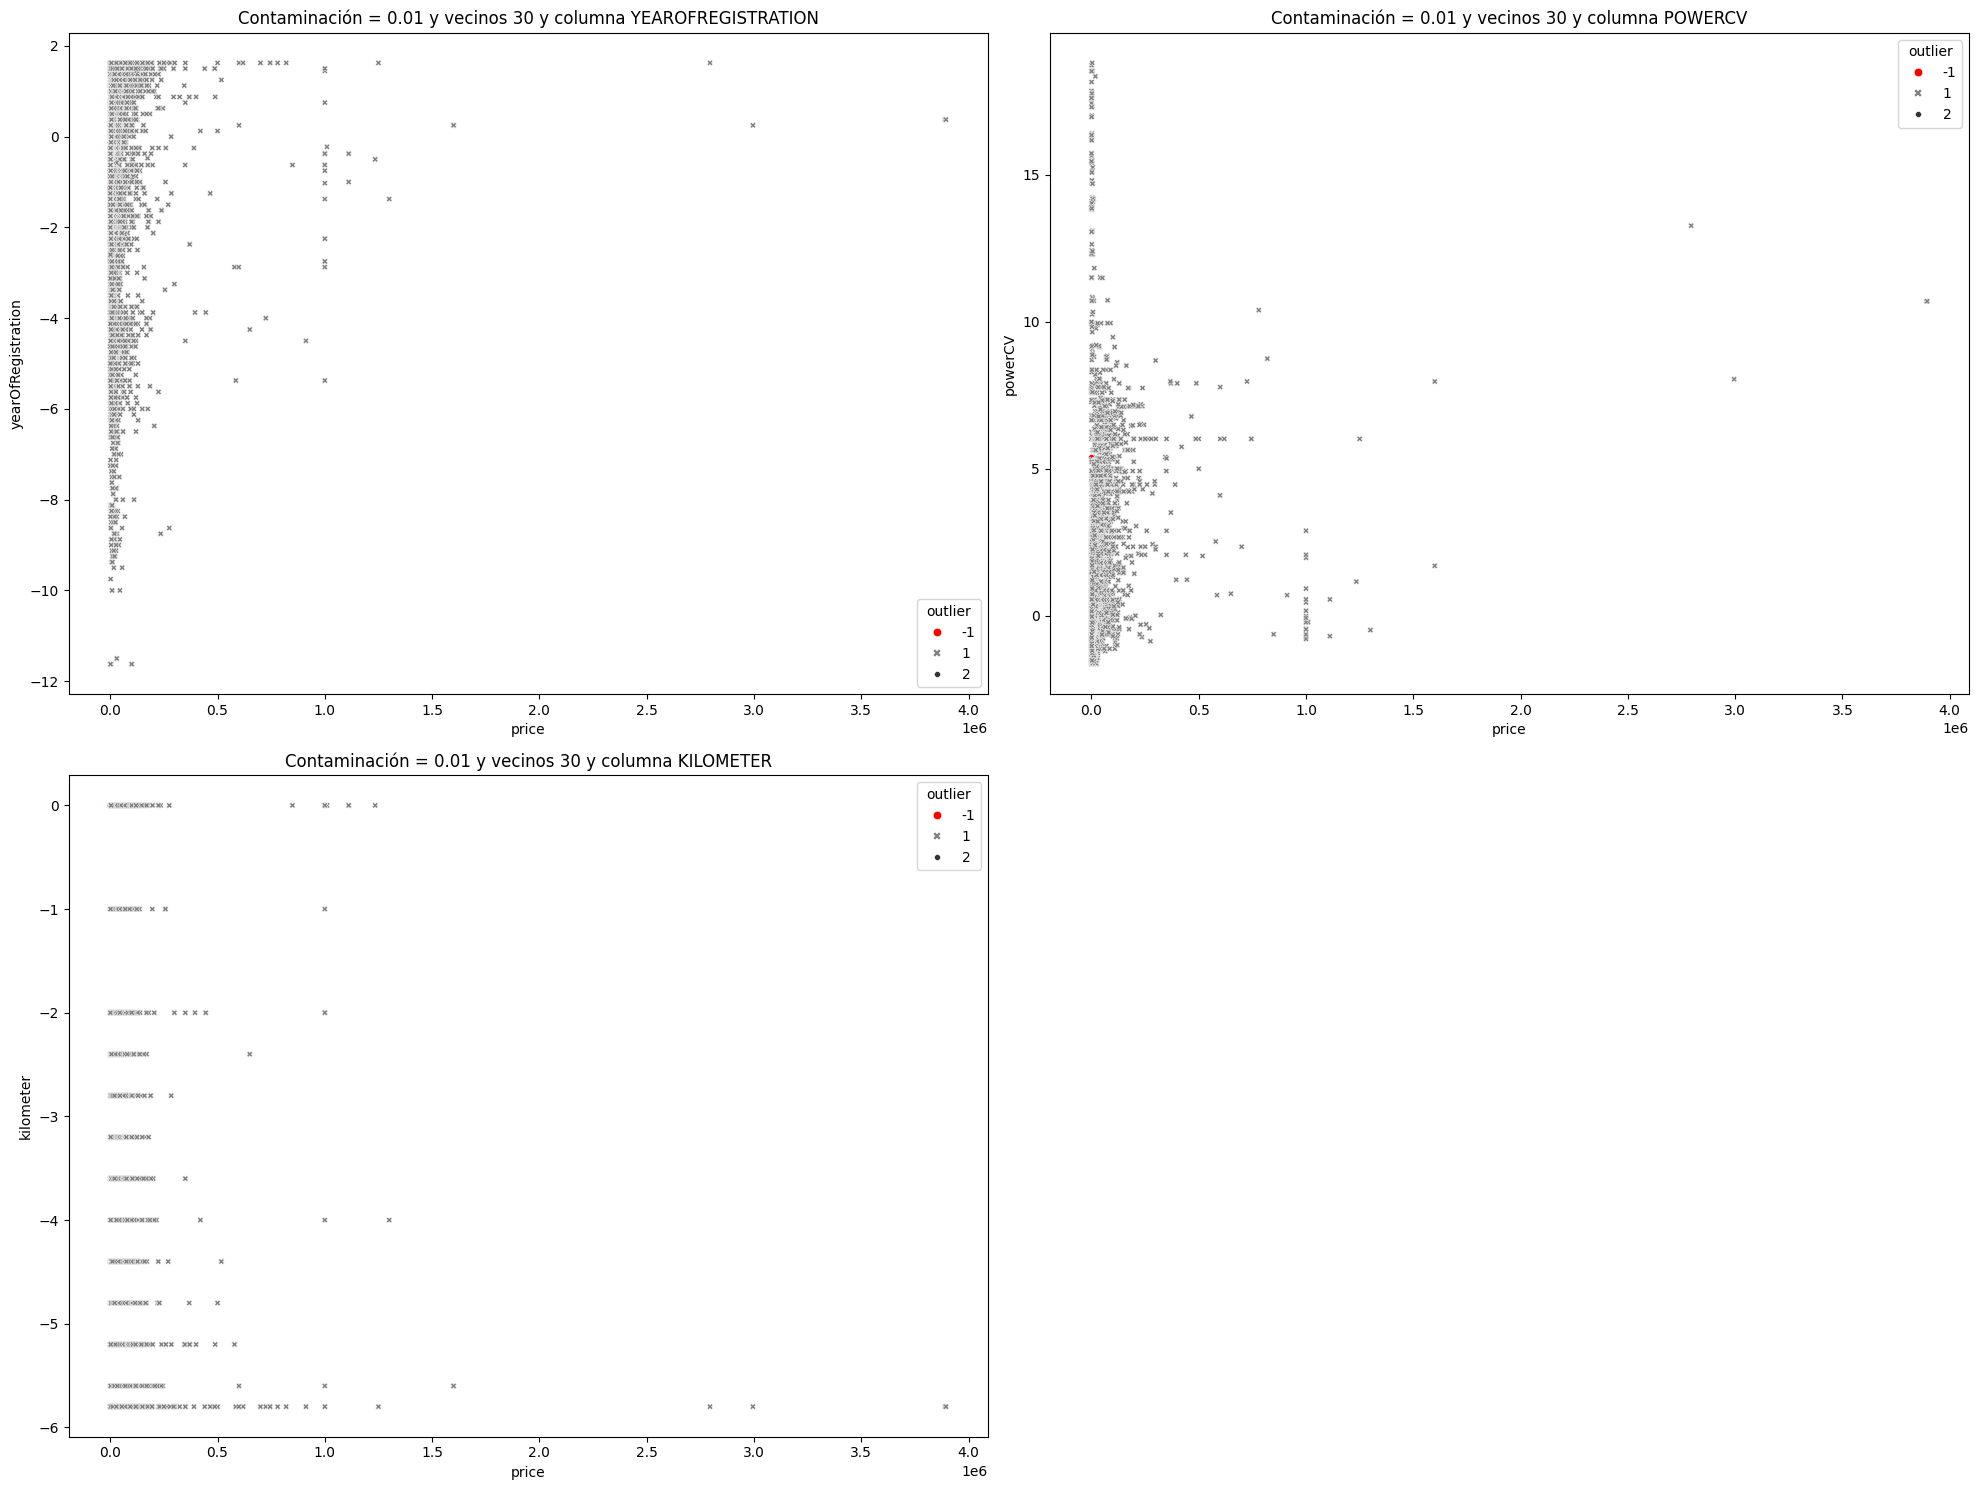

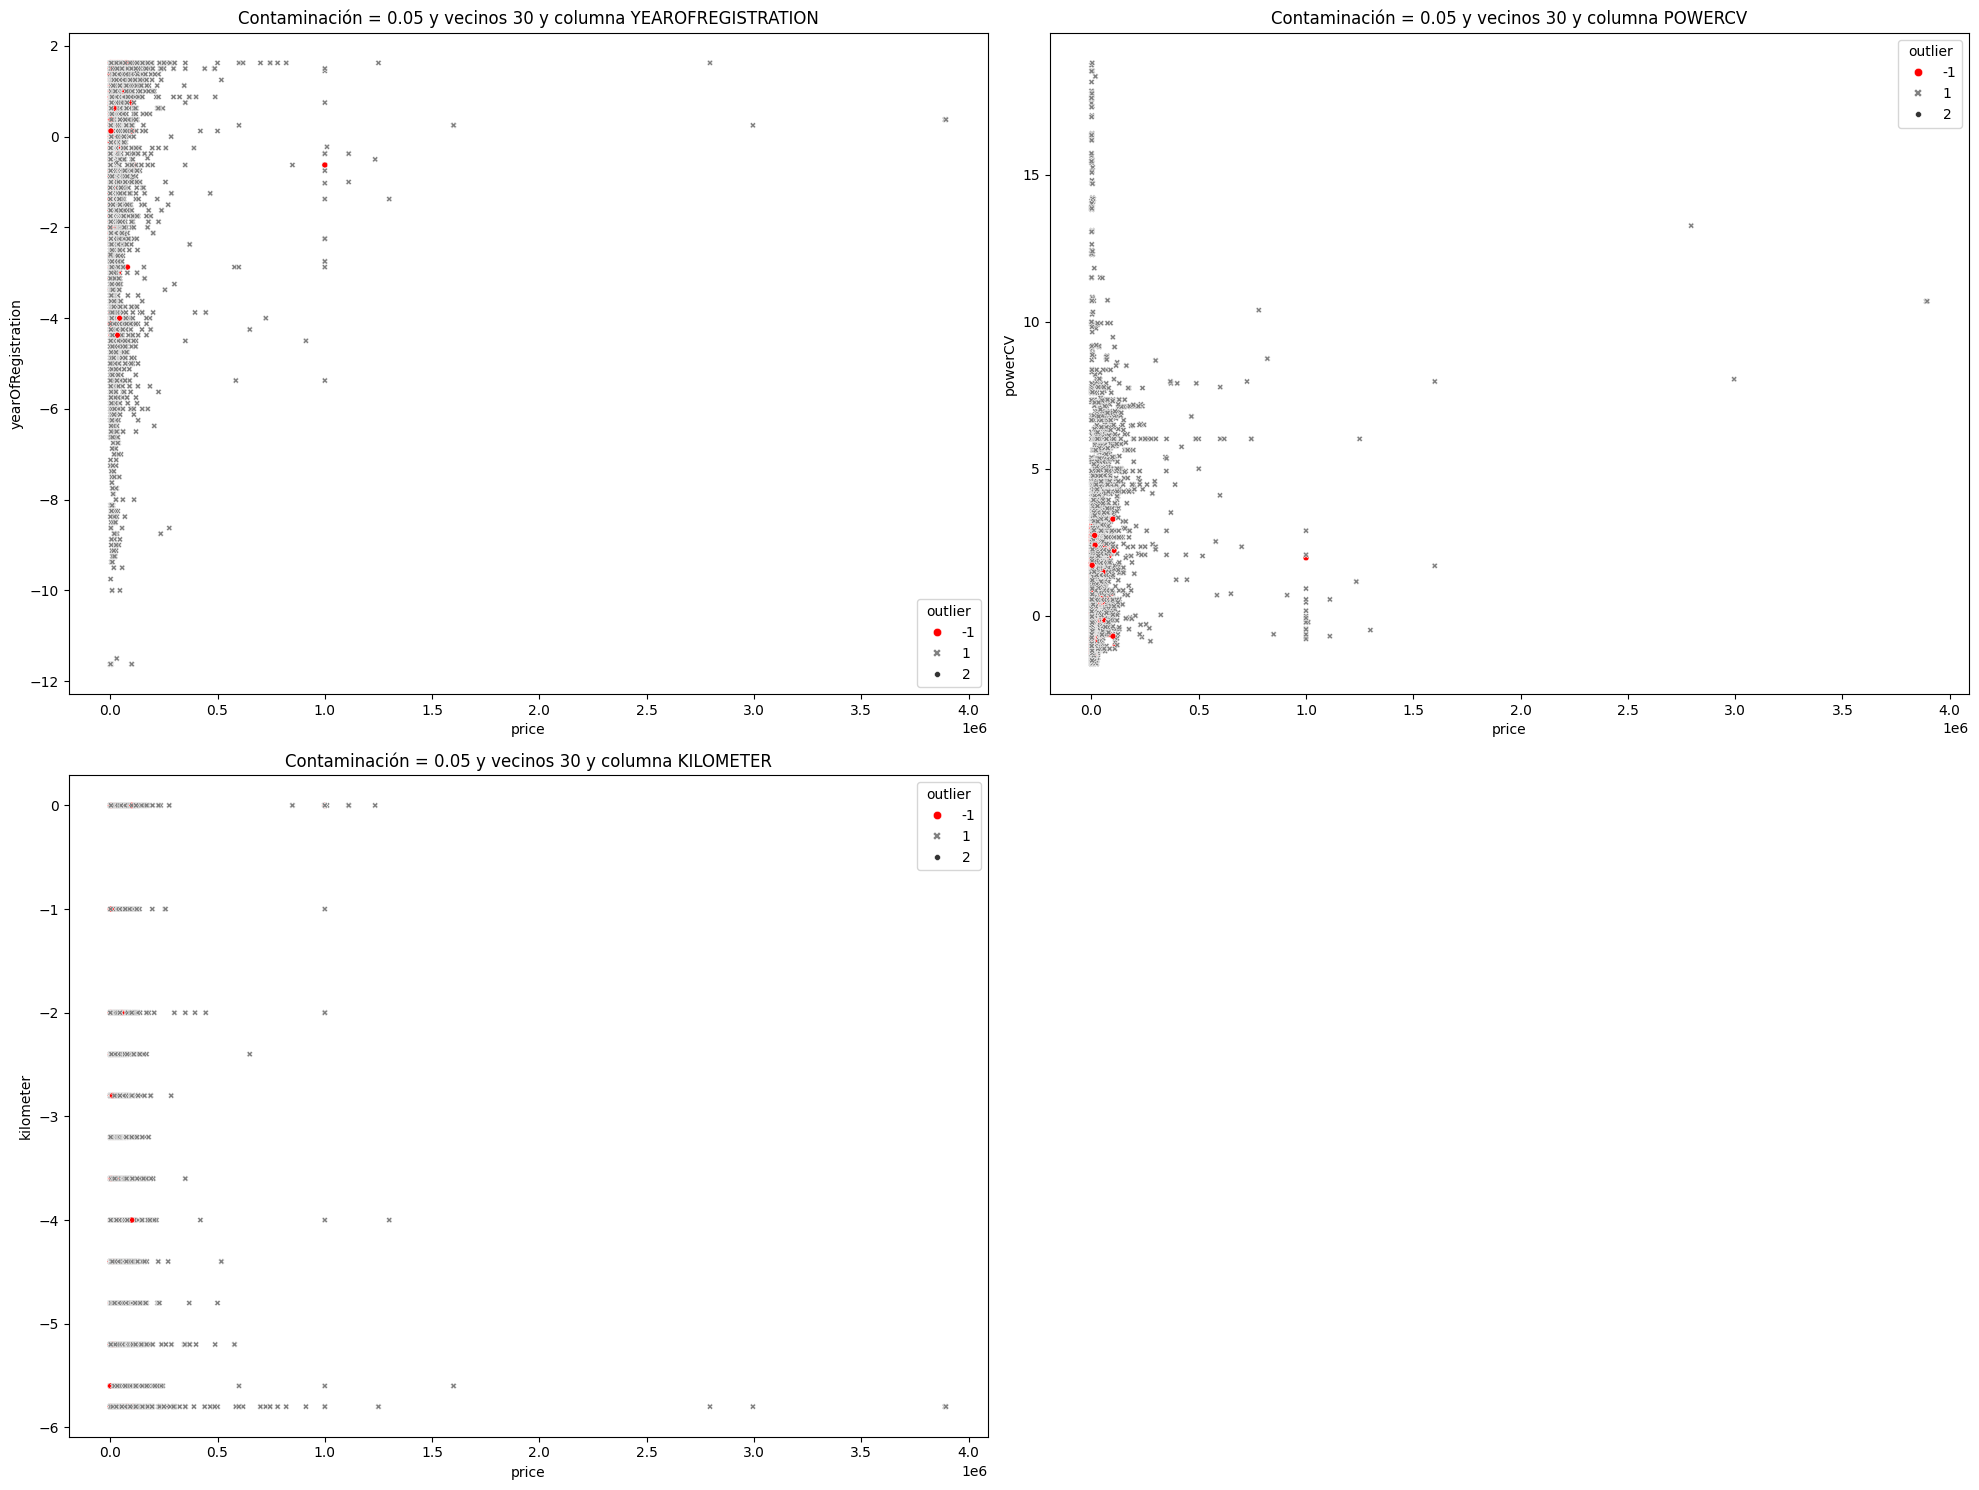

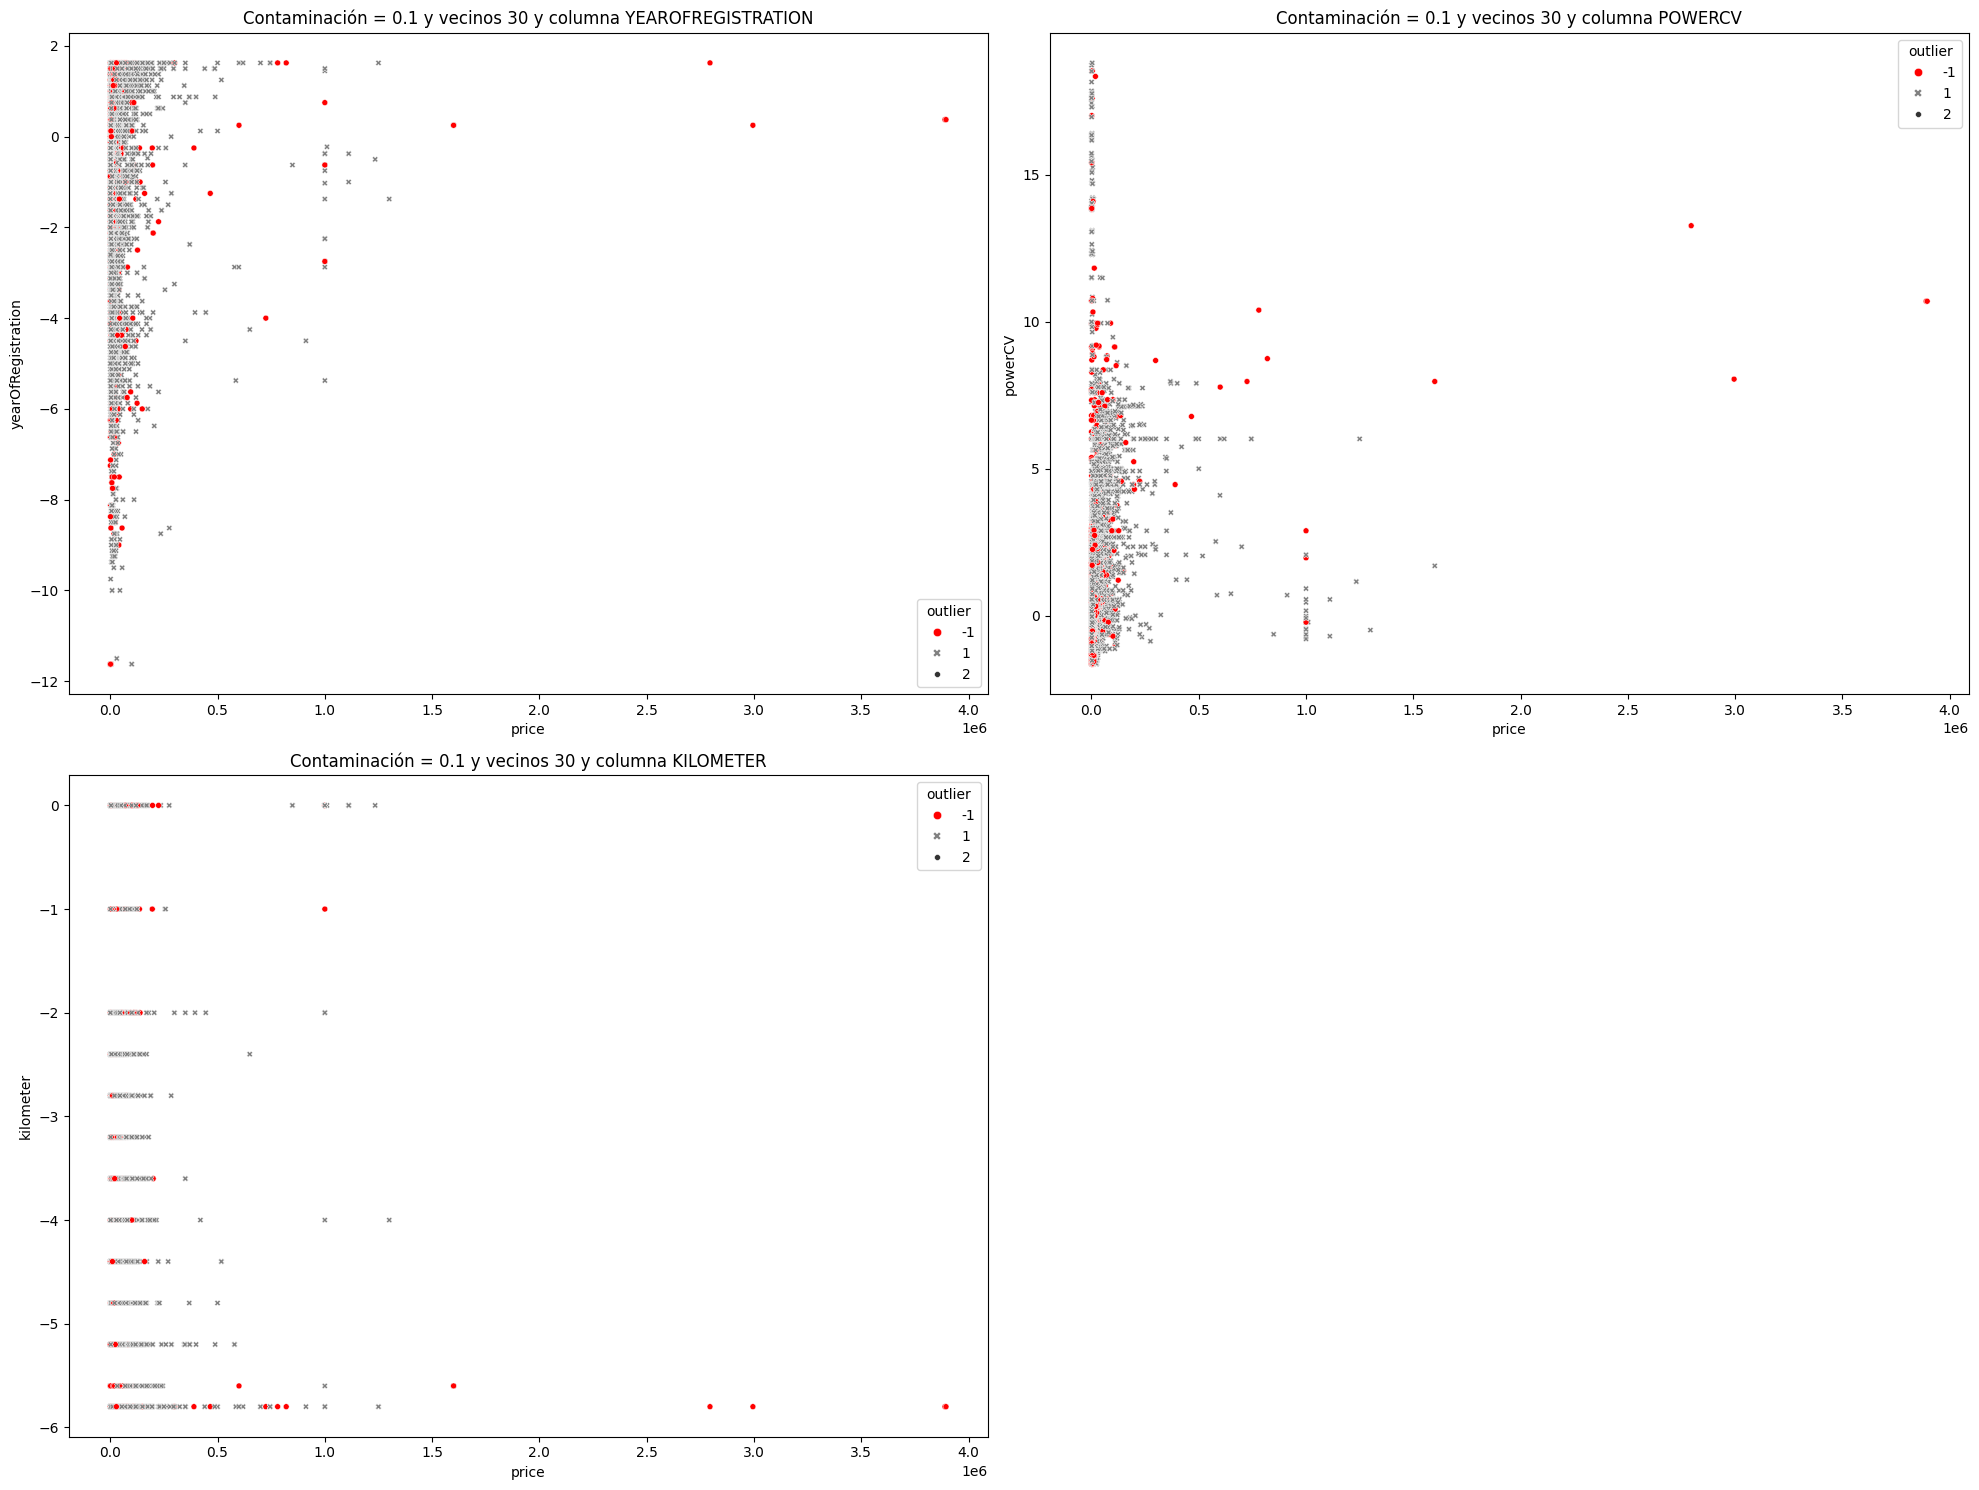

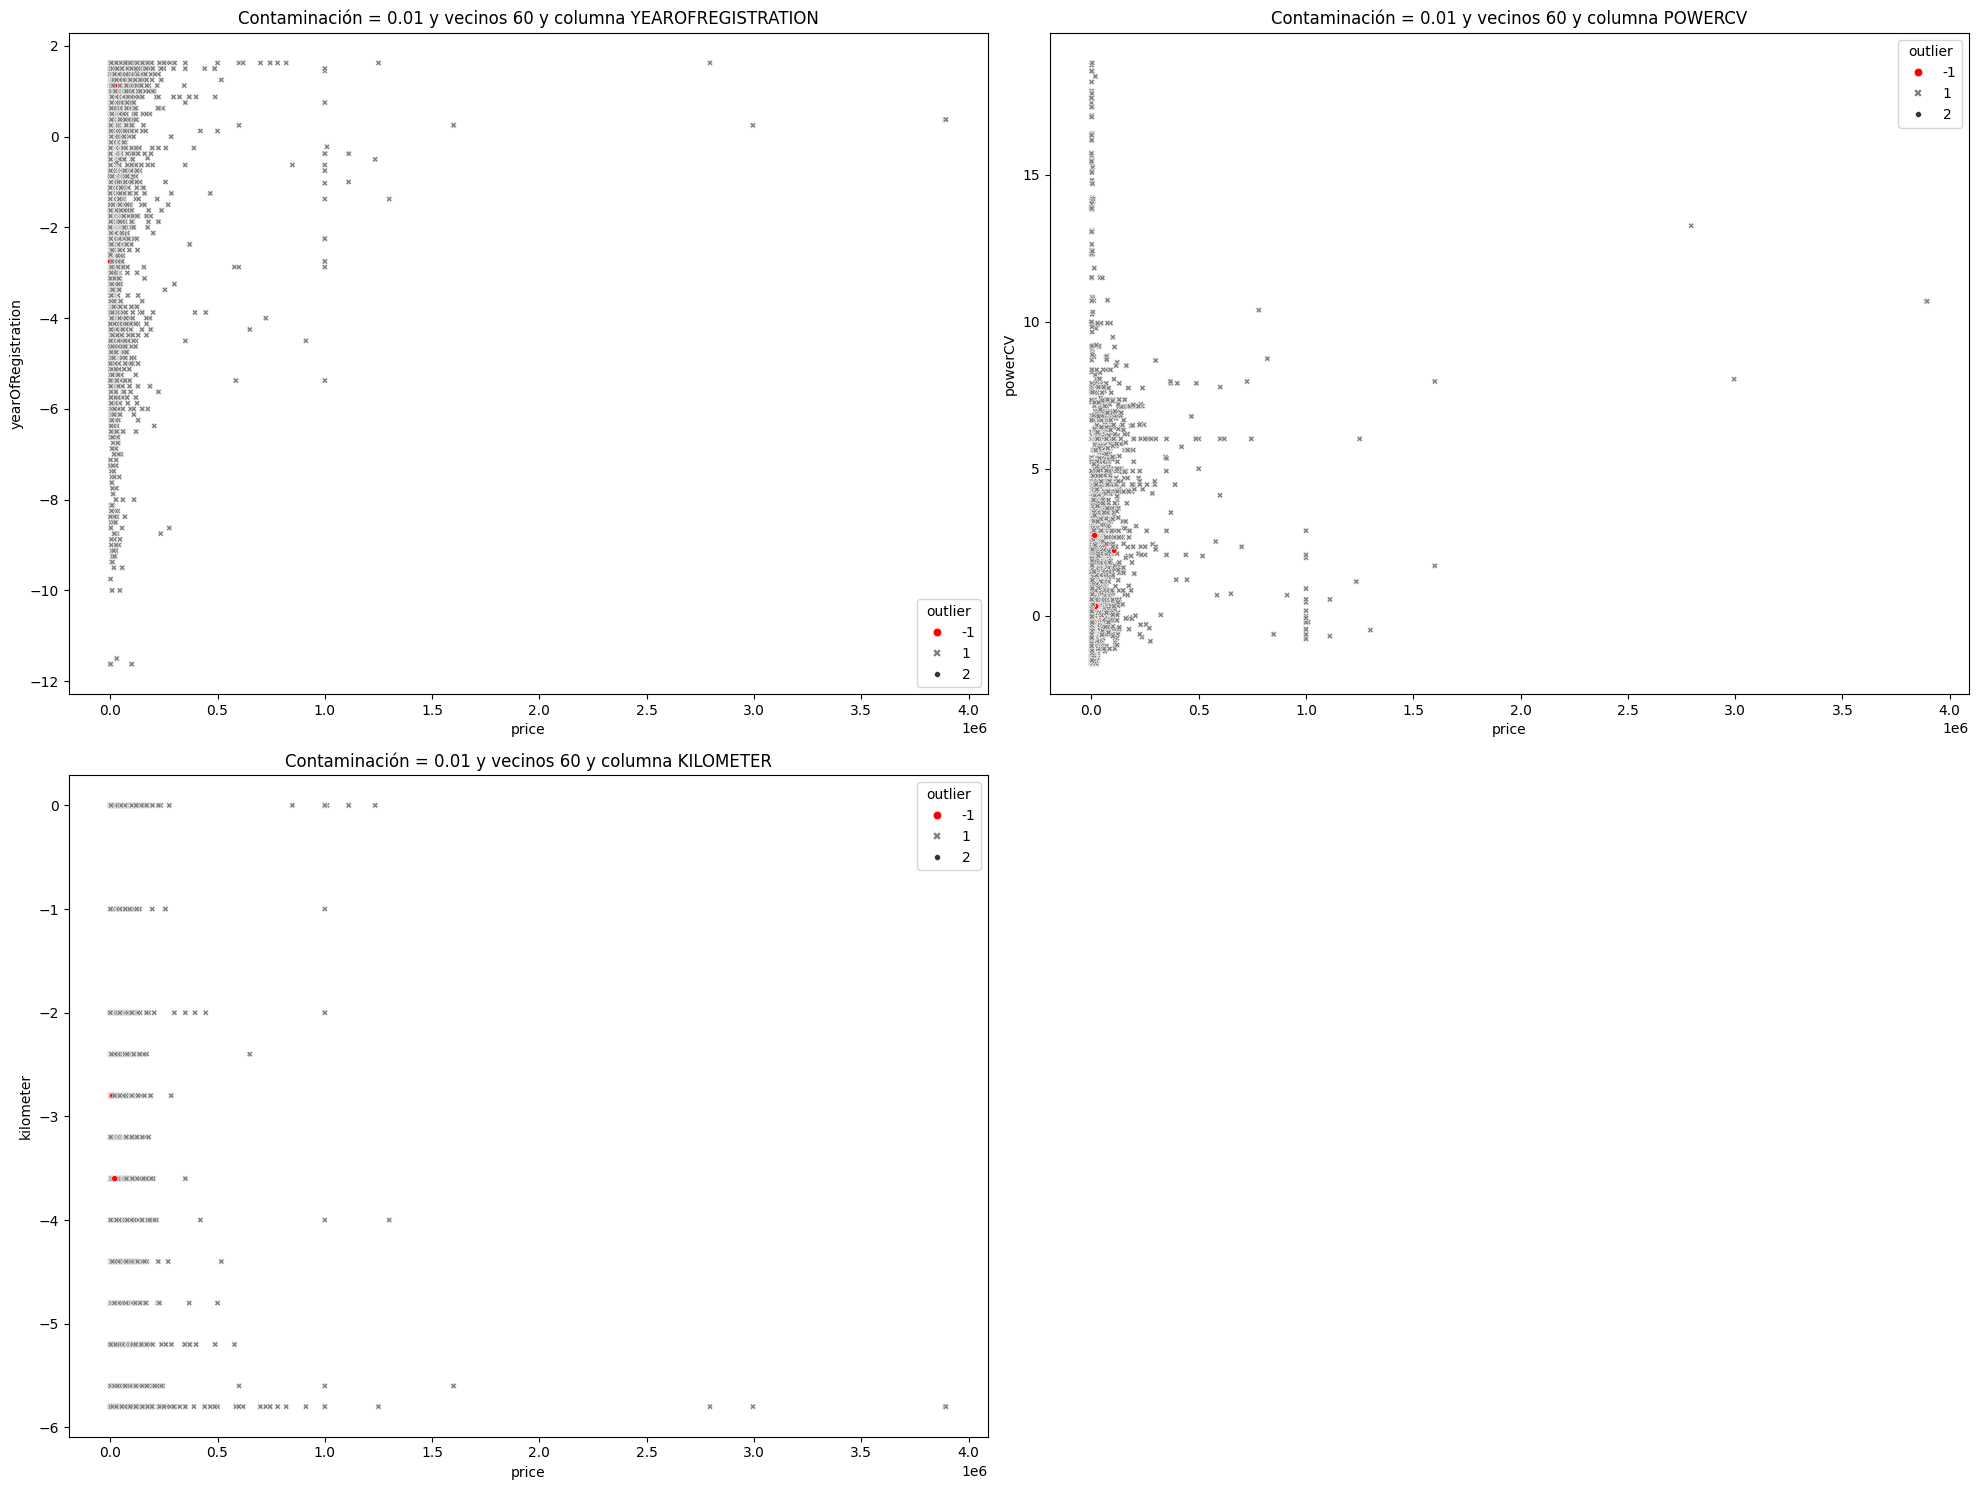

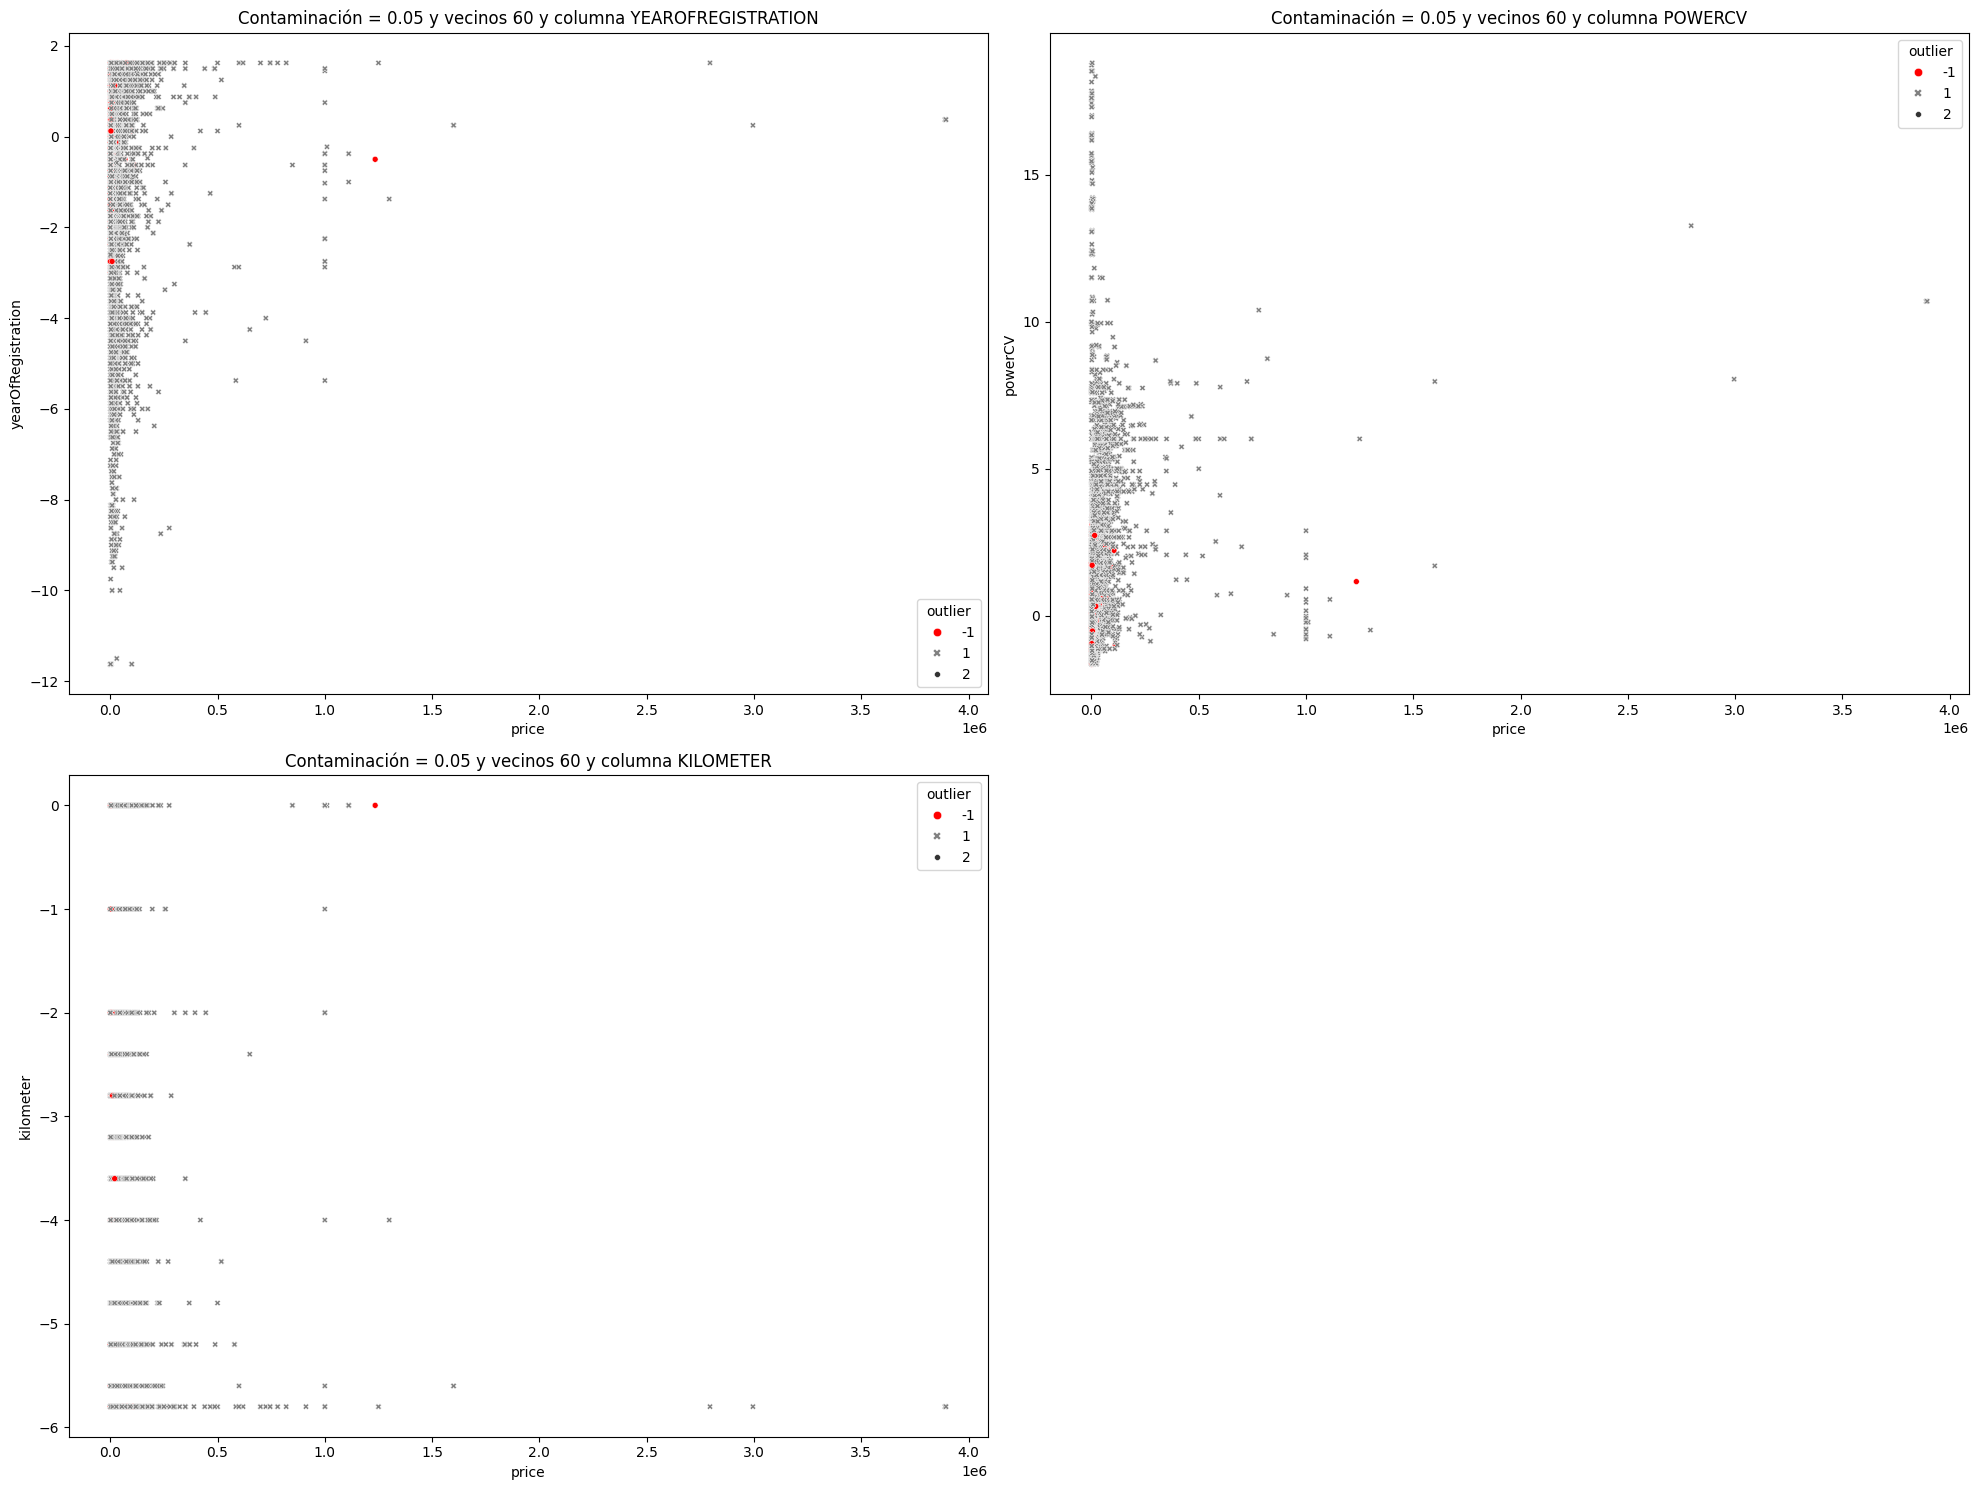

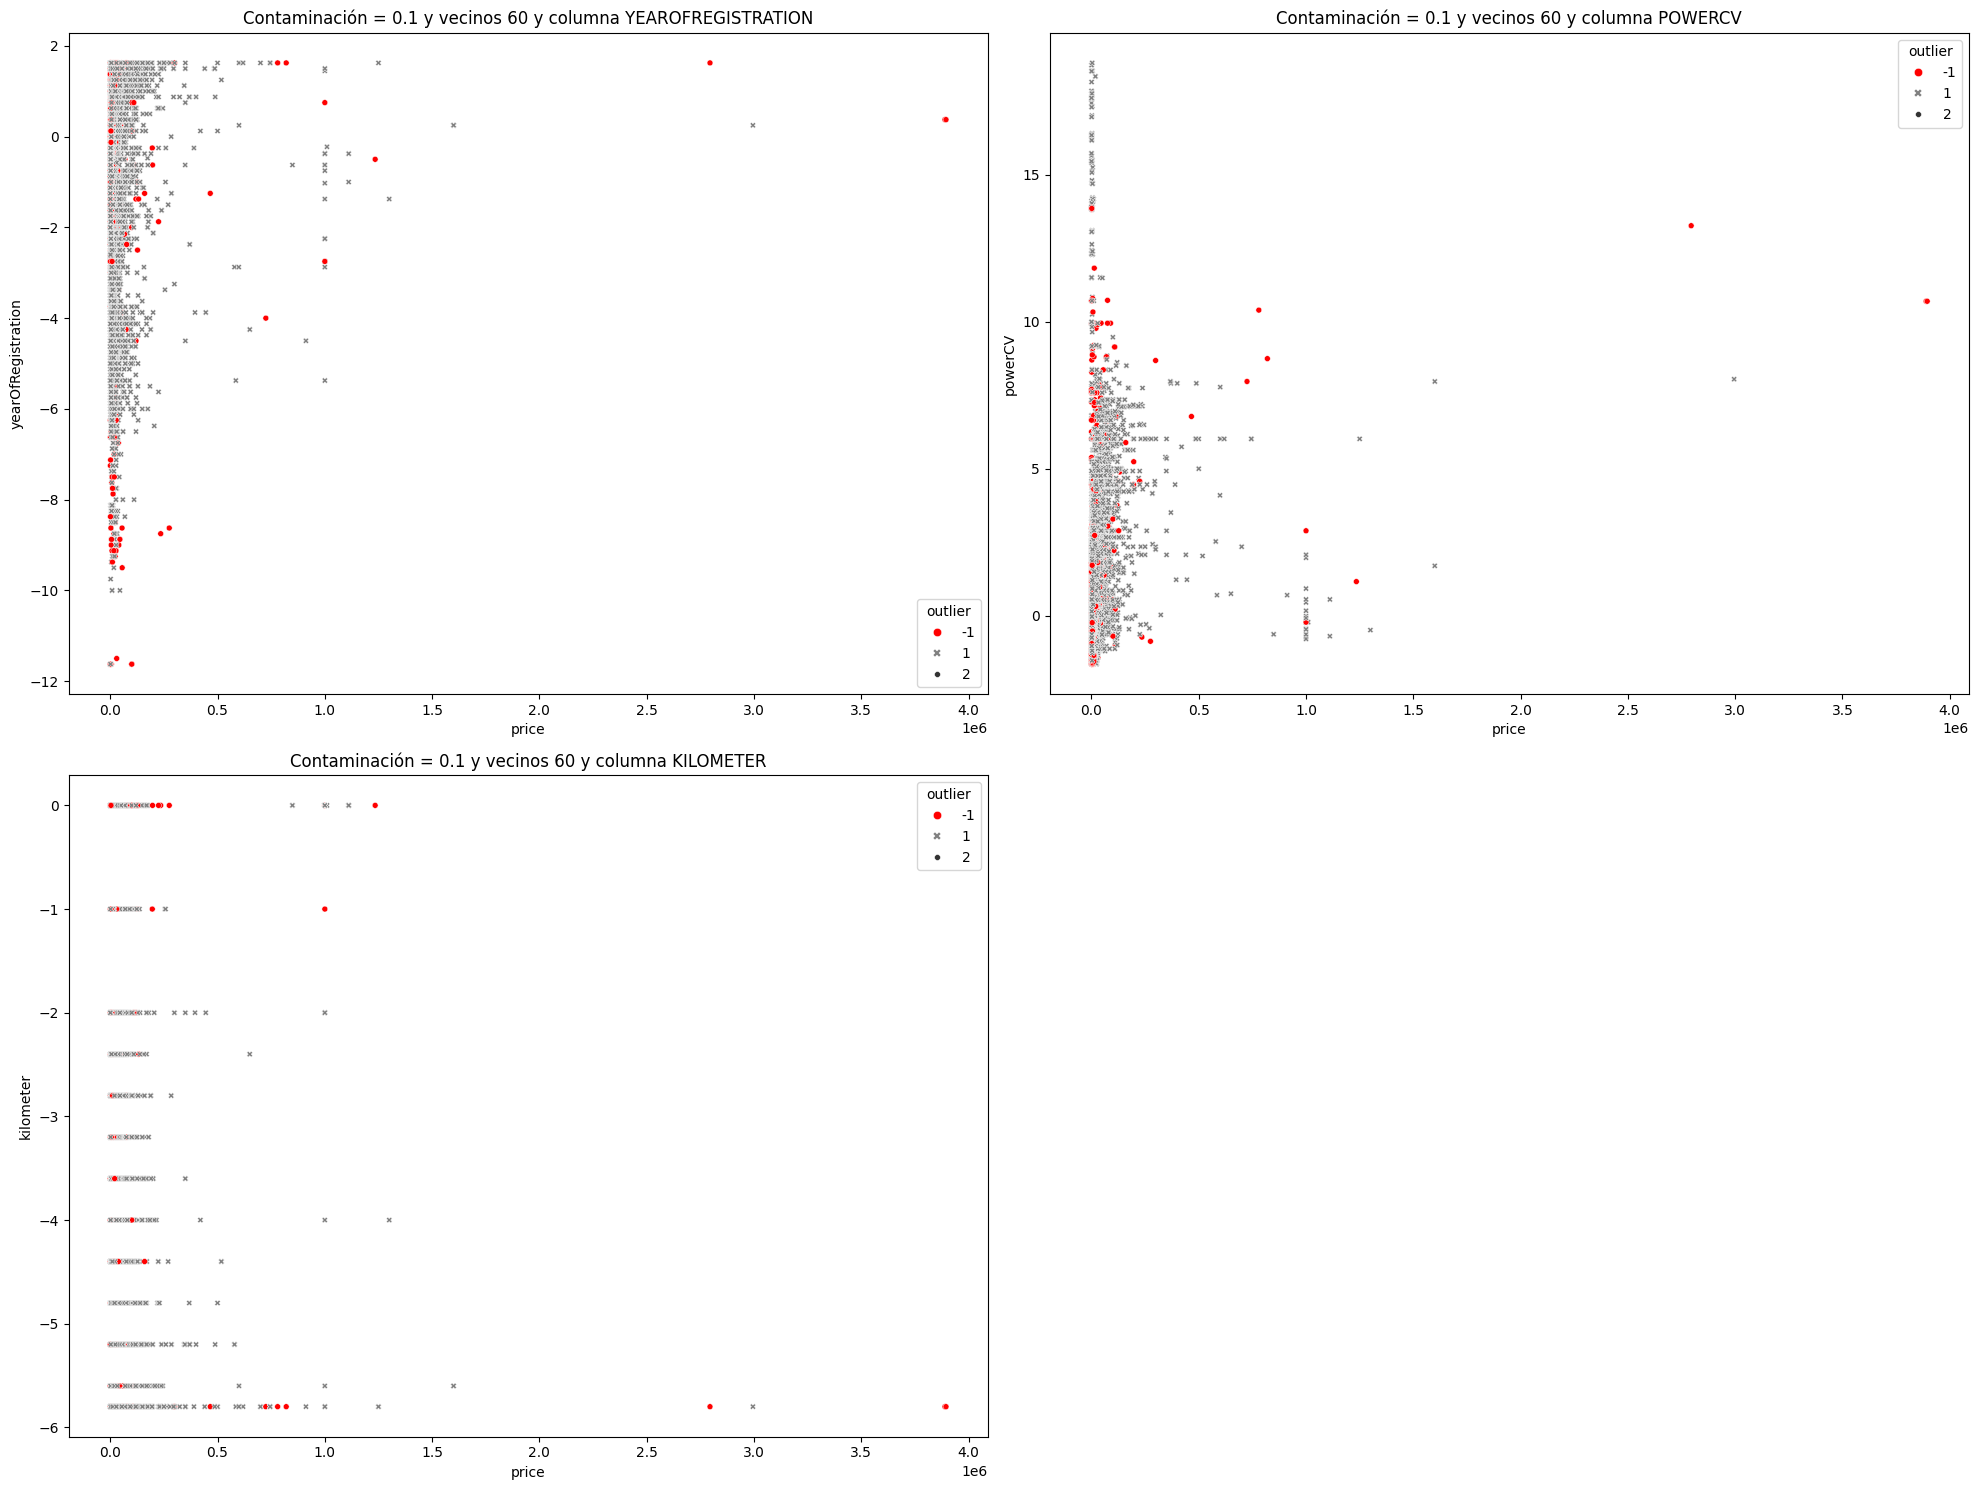

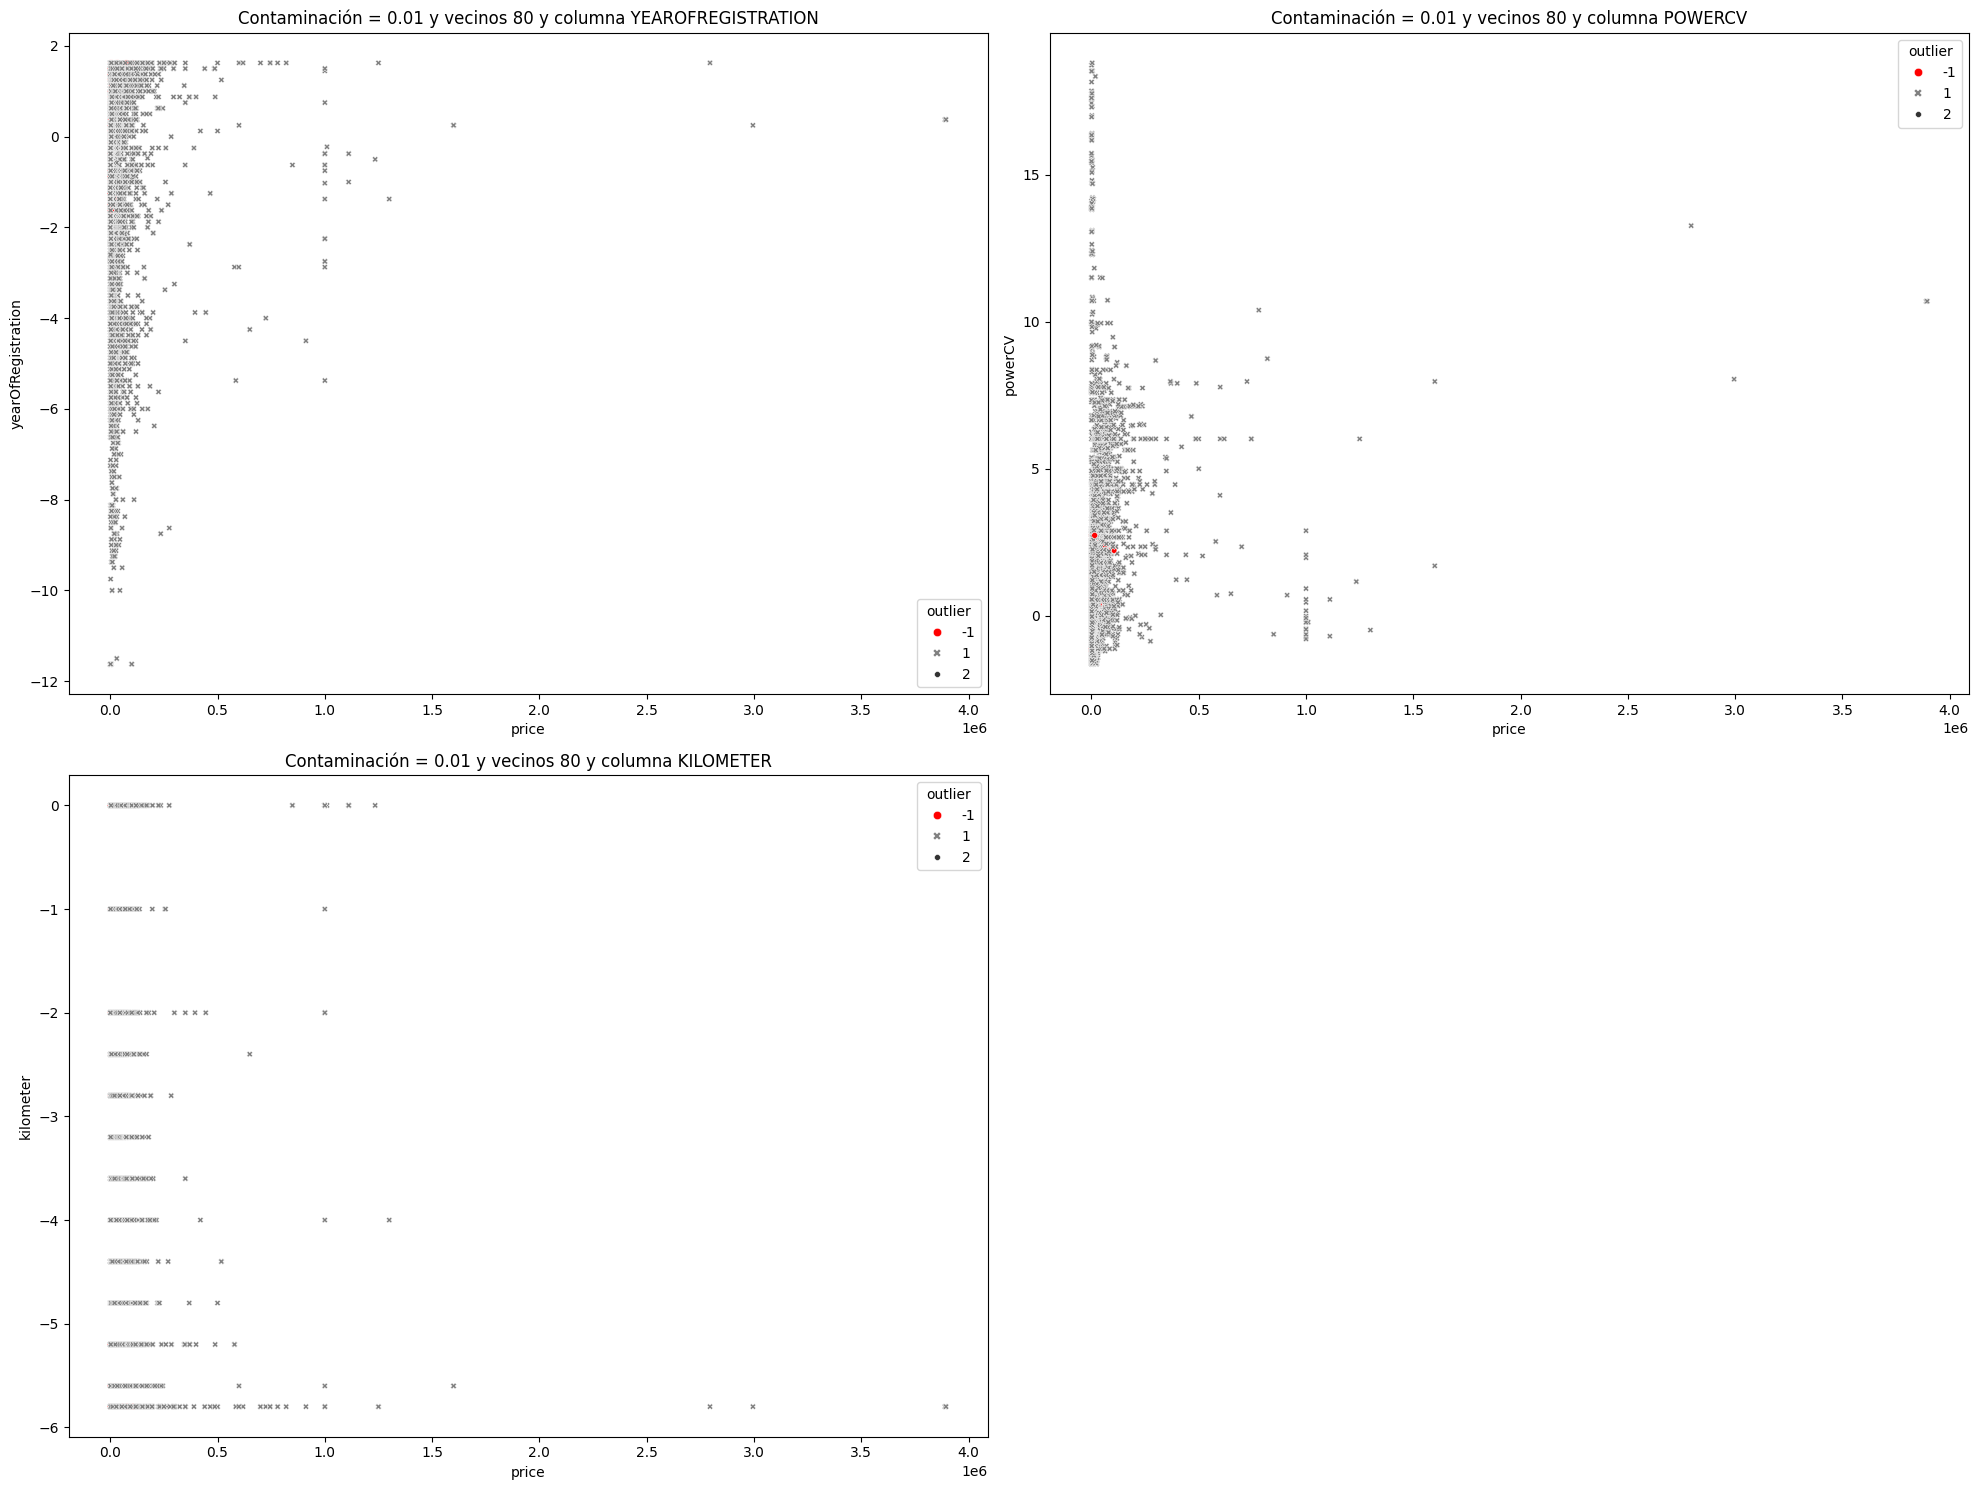

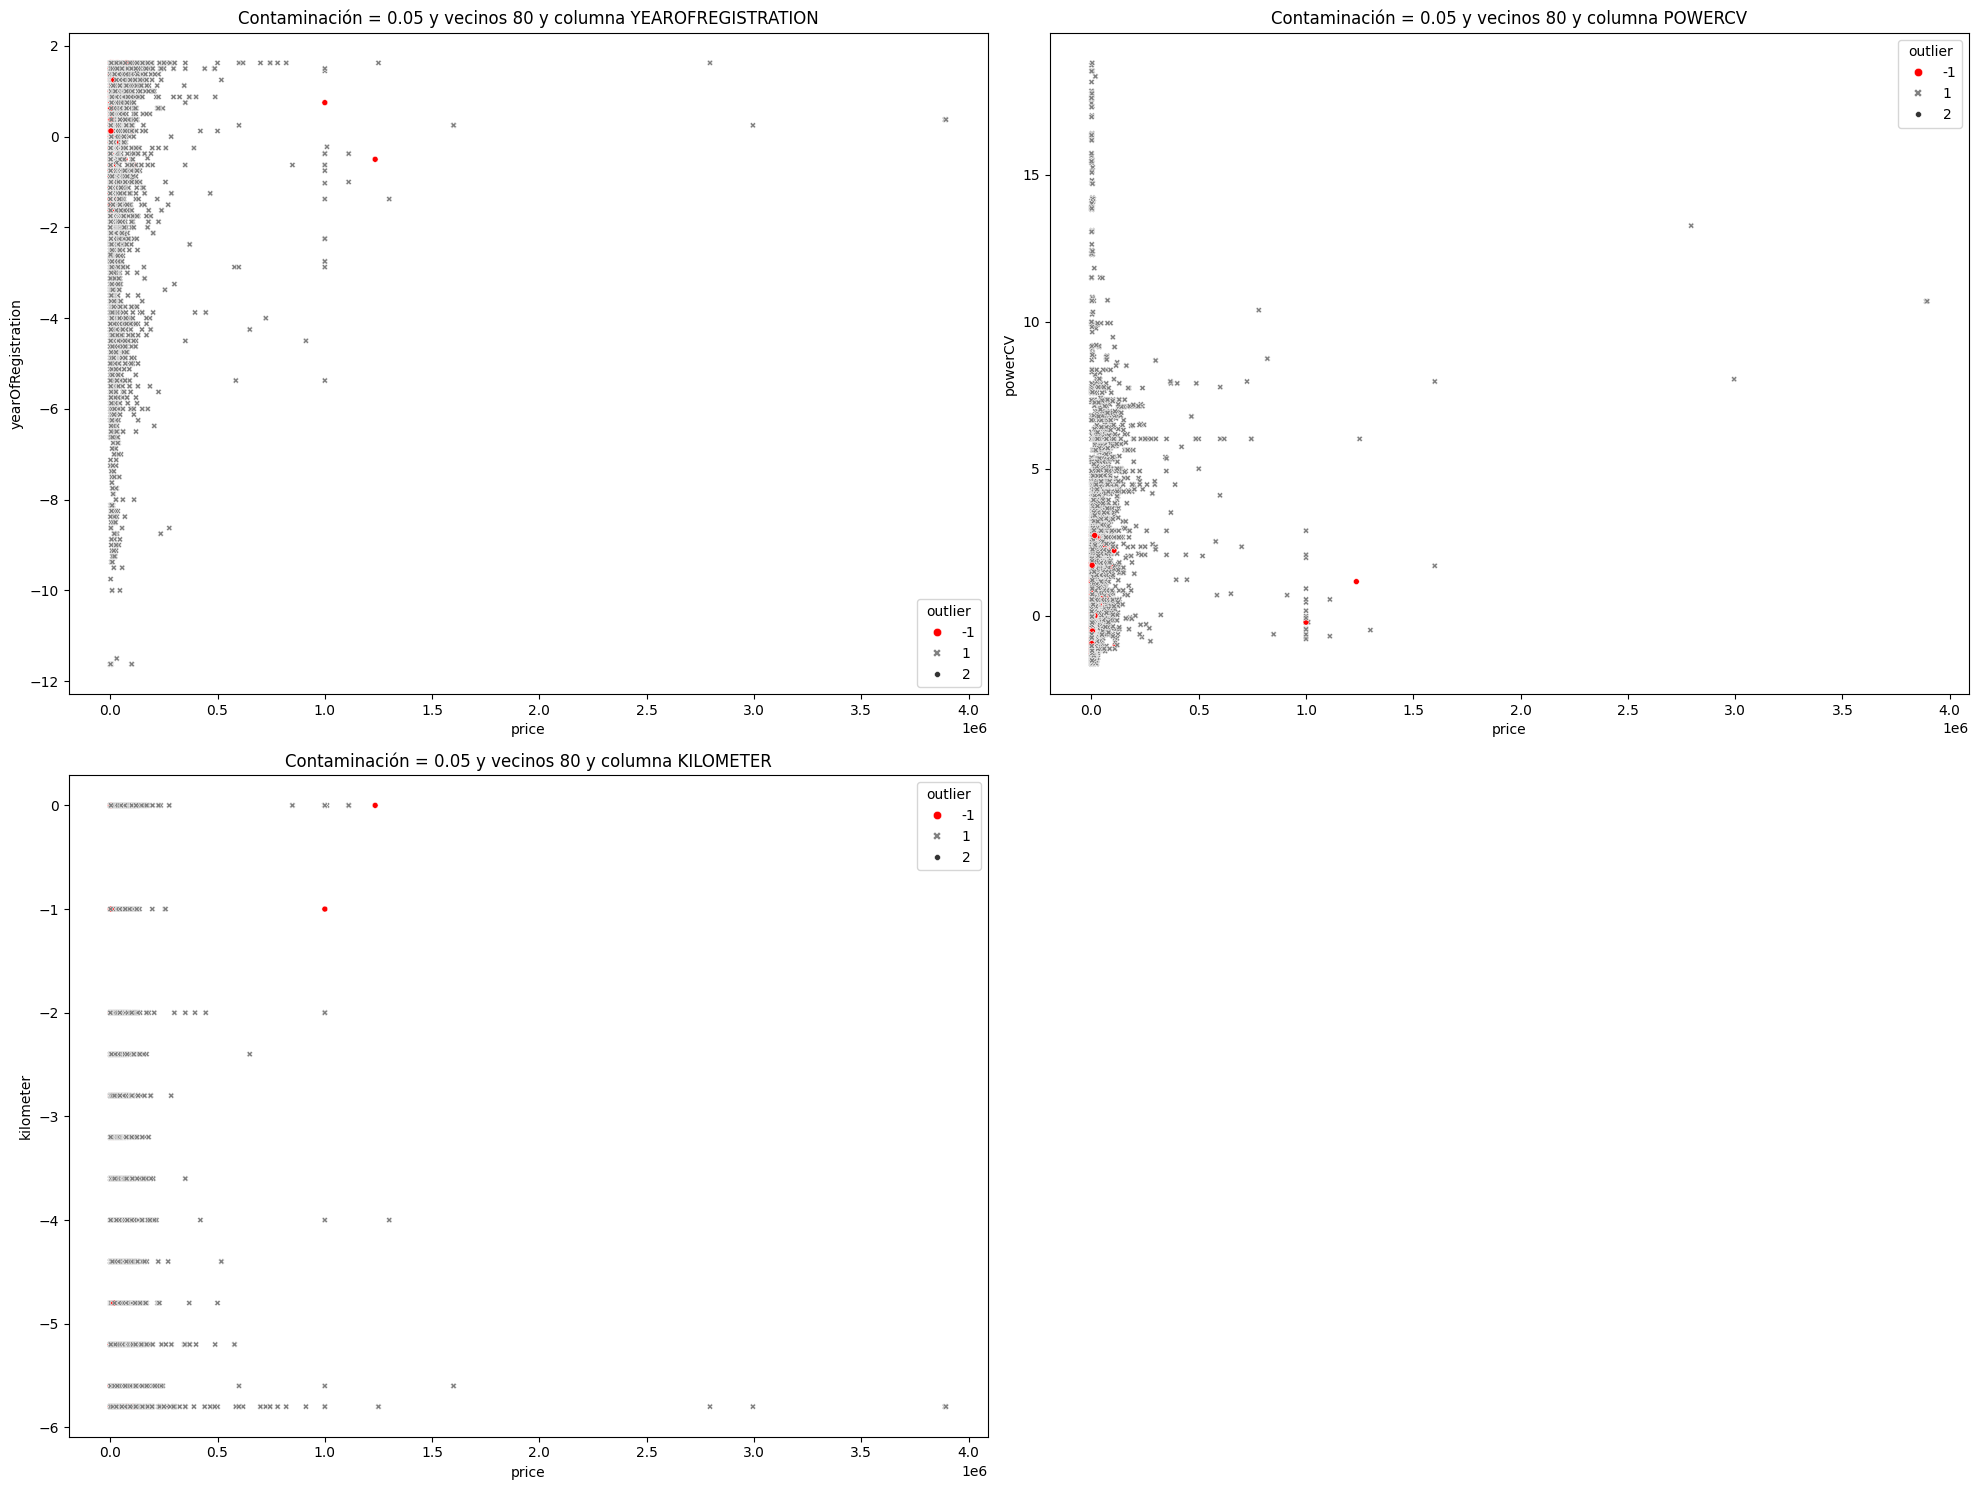

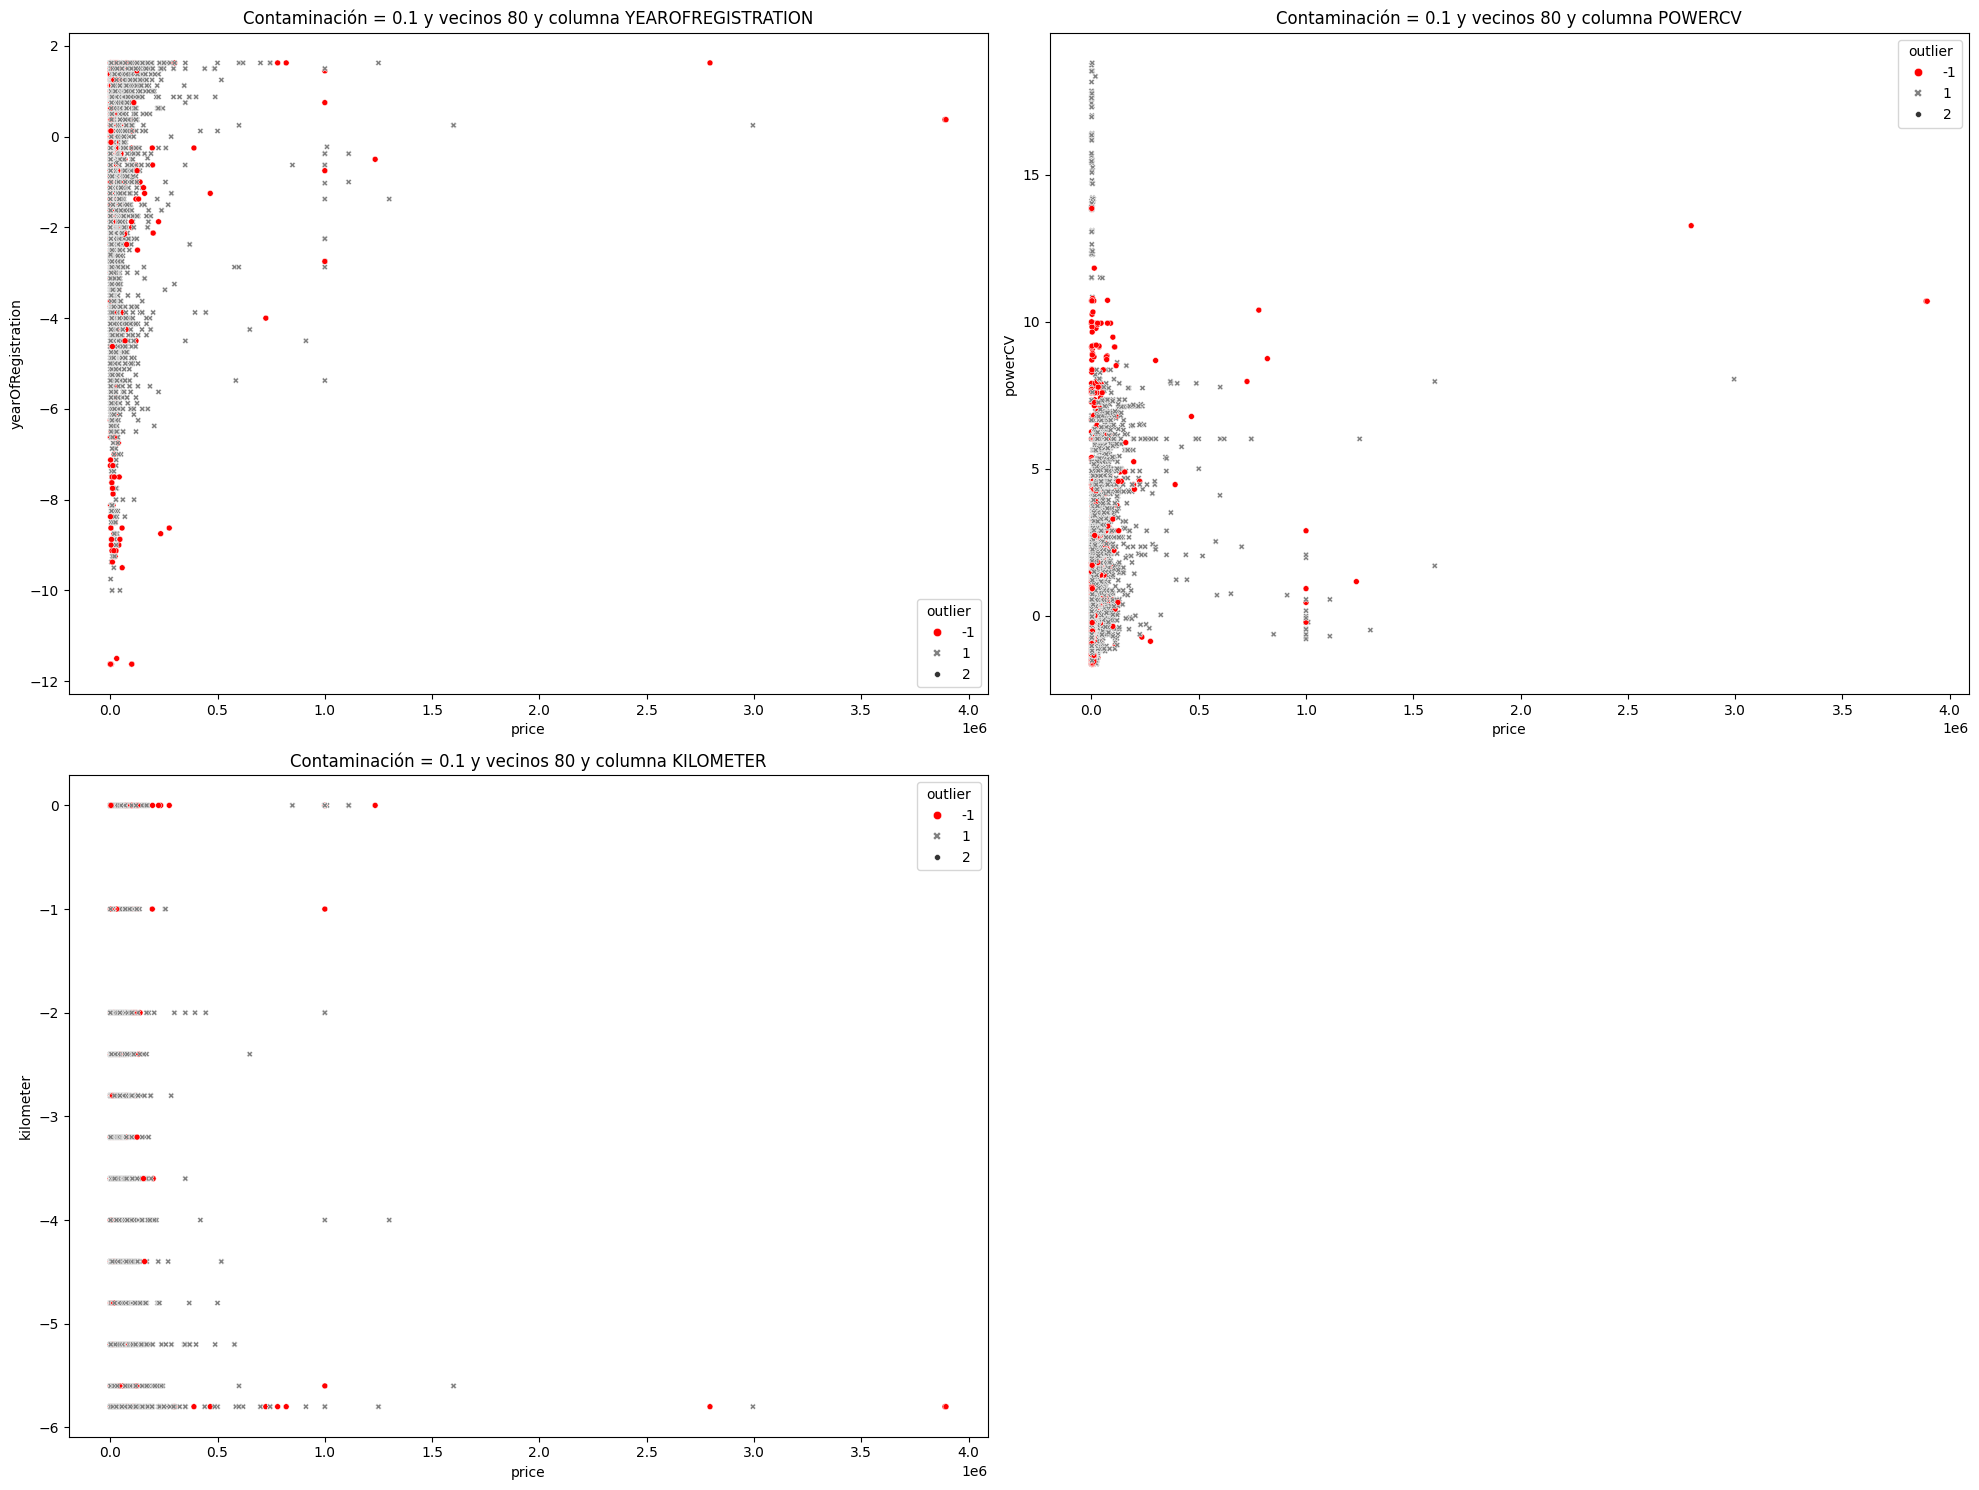

In [11]:
gestion_multi = GestionOutliersMultivariados(df)
gestion_multi.explorar_outliers_lof("price", indice_contaminacion, vecinos)

A simple vista y con diferentes combinaciones de n칰mero de vecinos no parece captar adecuadamente los outliers.

---

### Isolation forest

Probemos con el m칠todo `Isolation forest`

In [12]:
indice_contaminacion=[0.01, 0.05, 0.1]

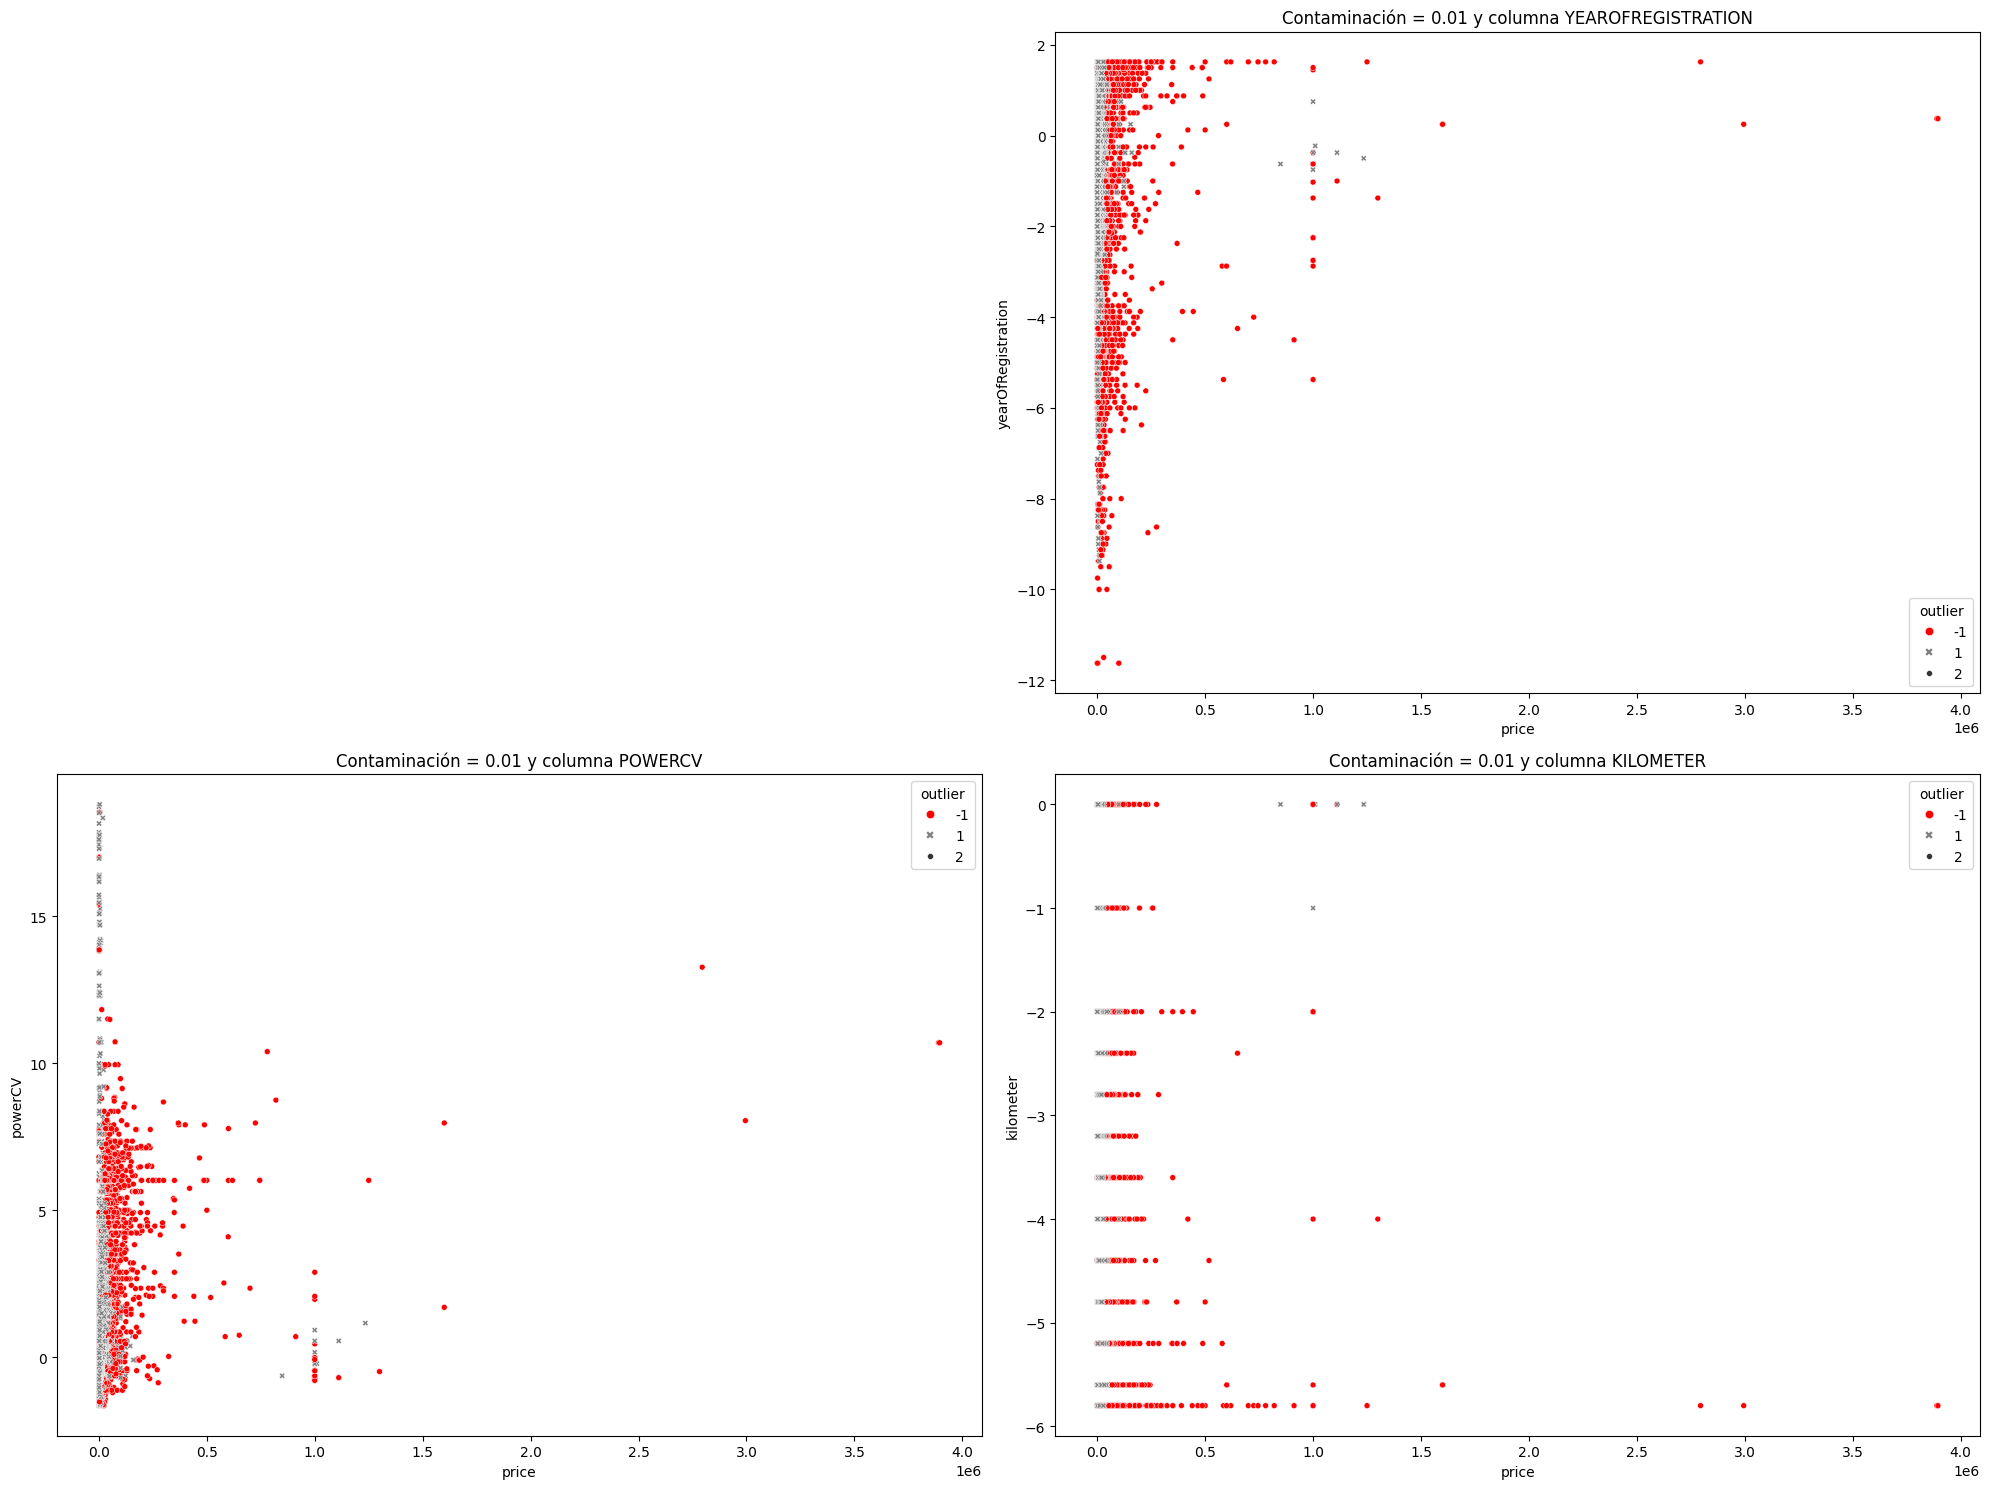

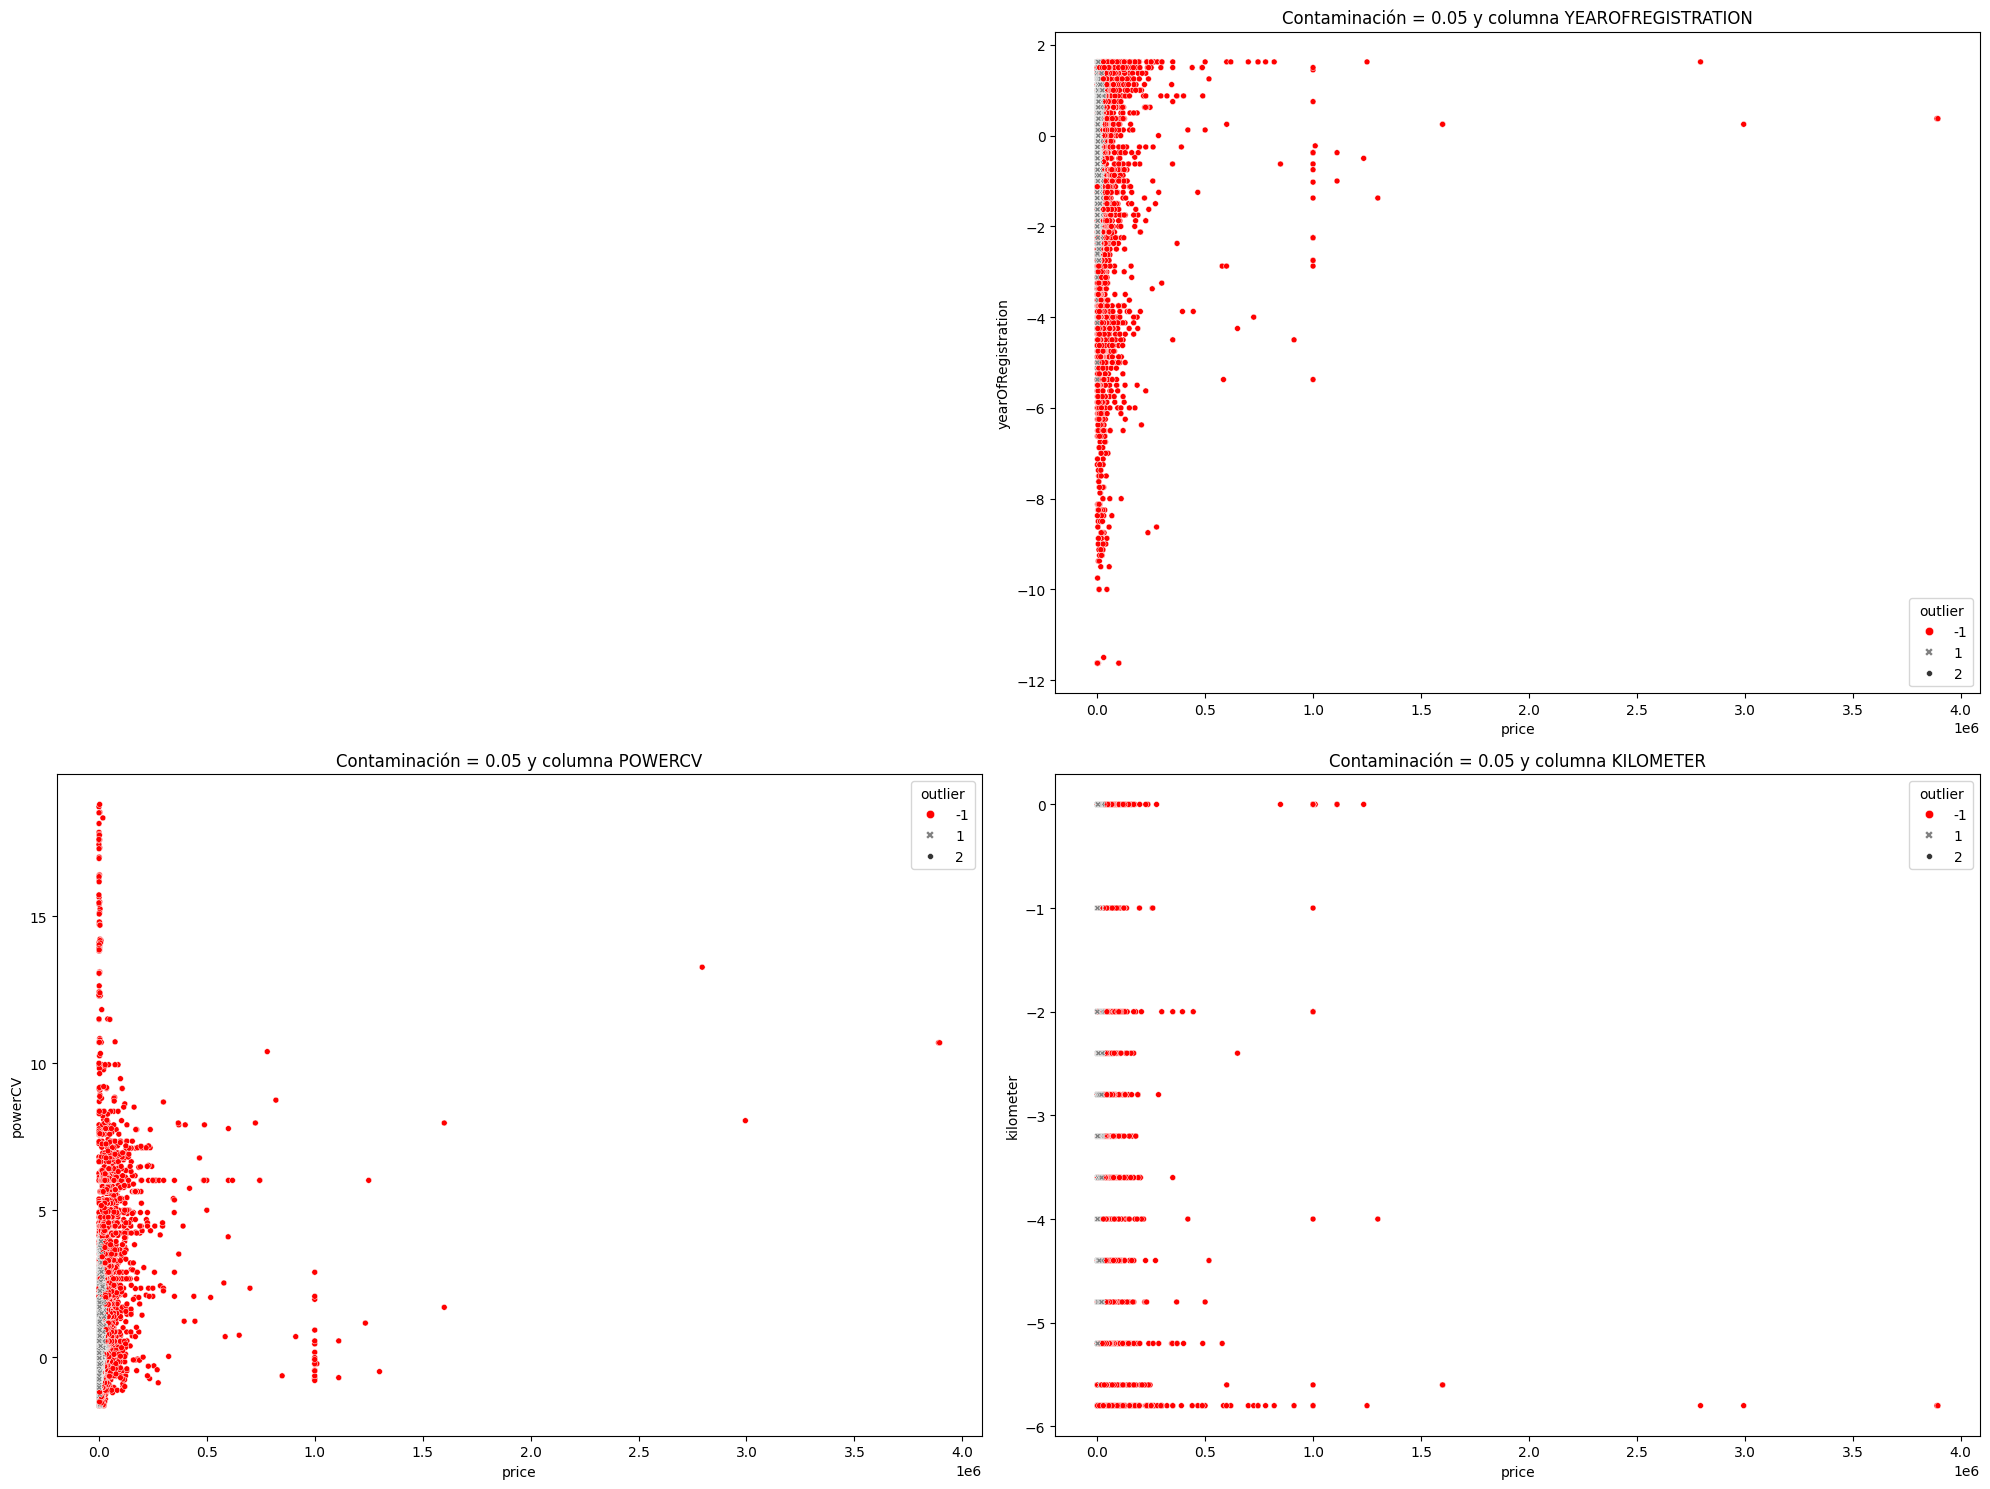

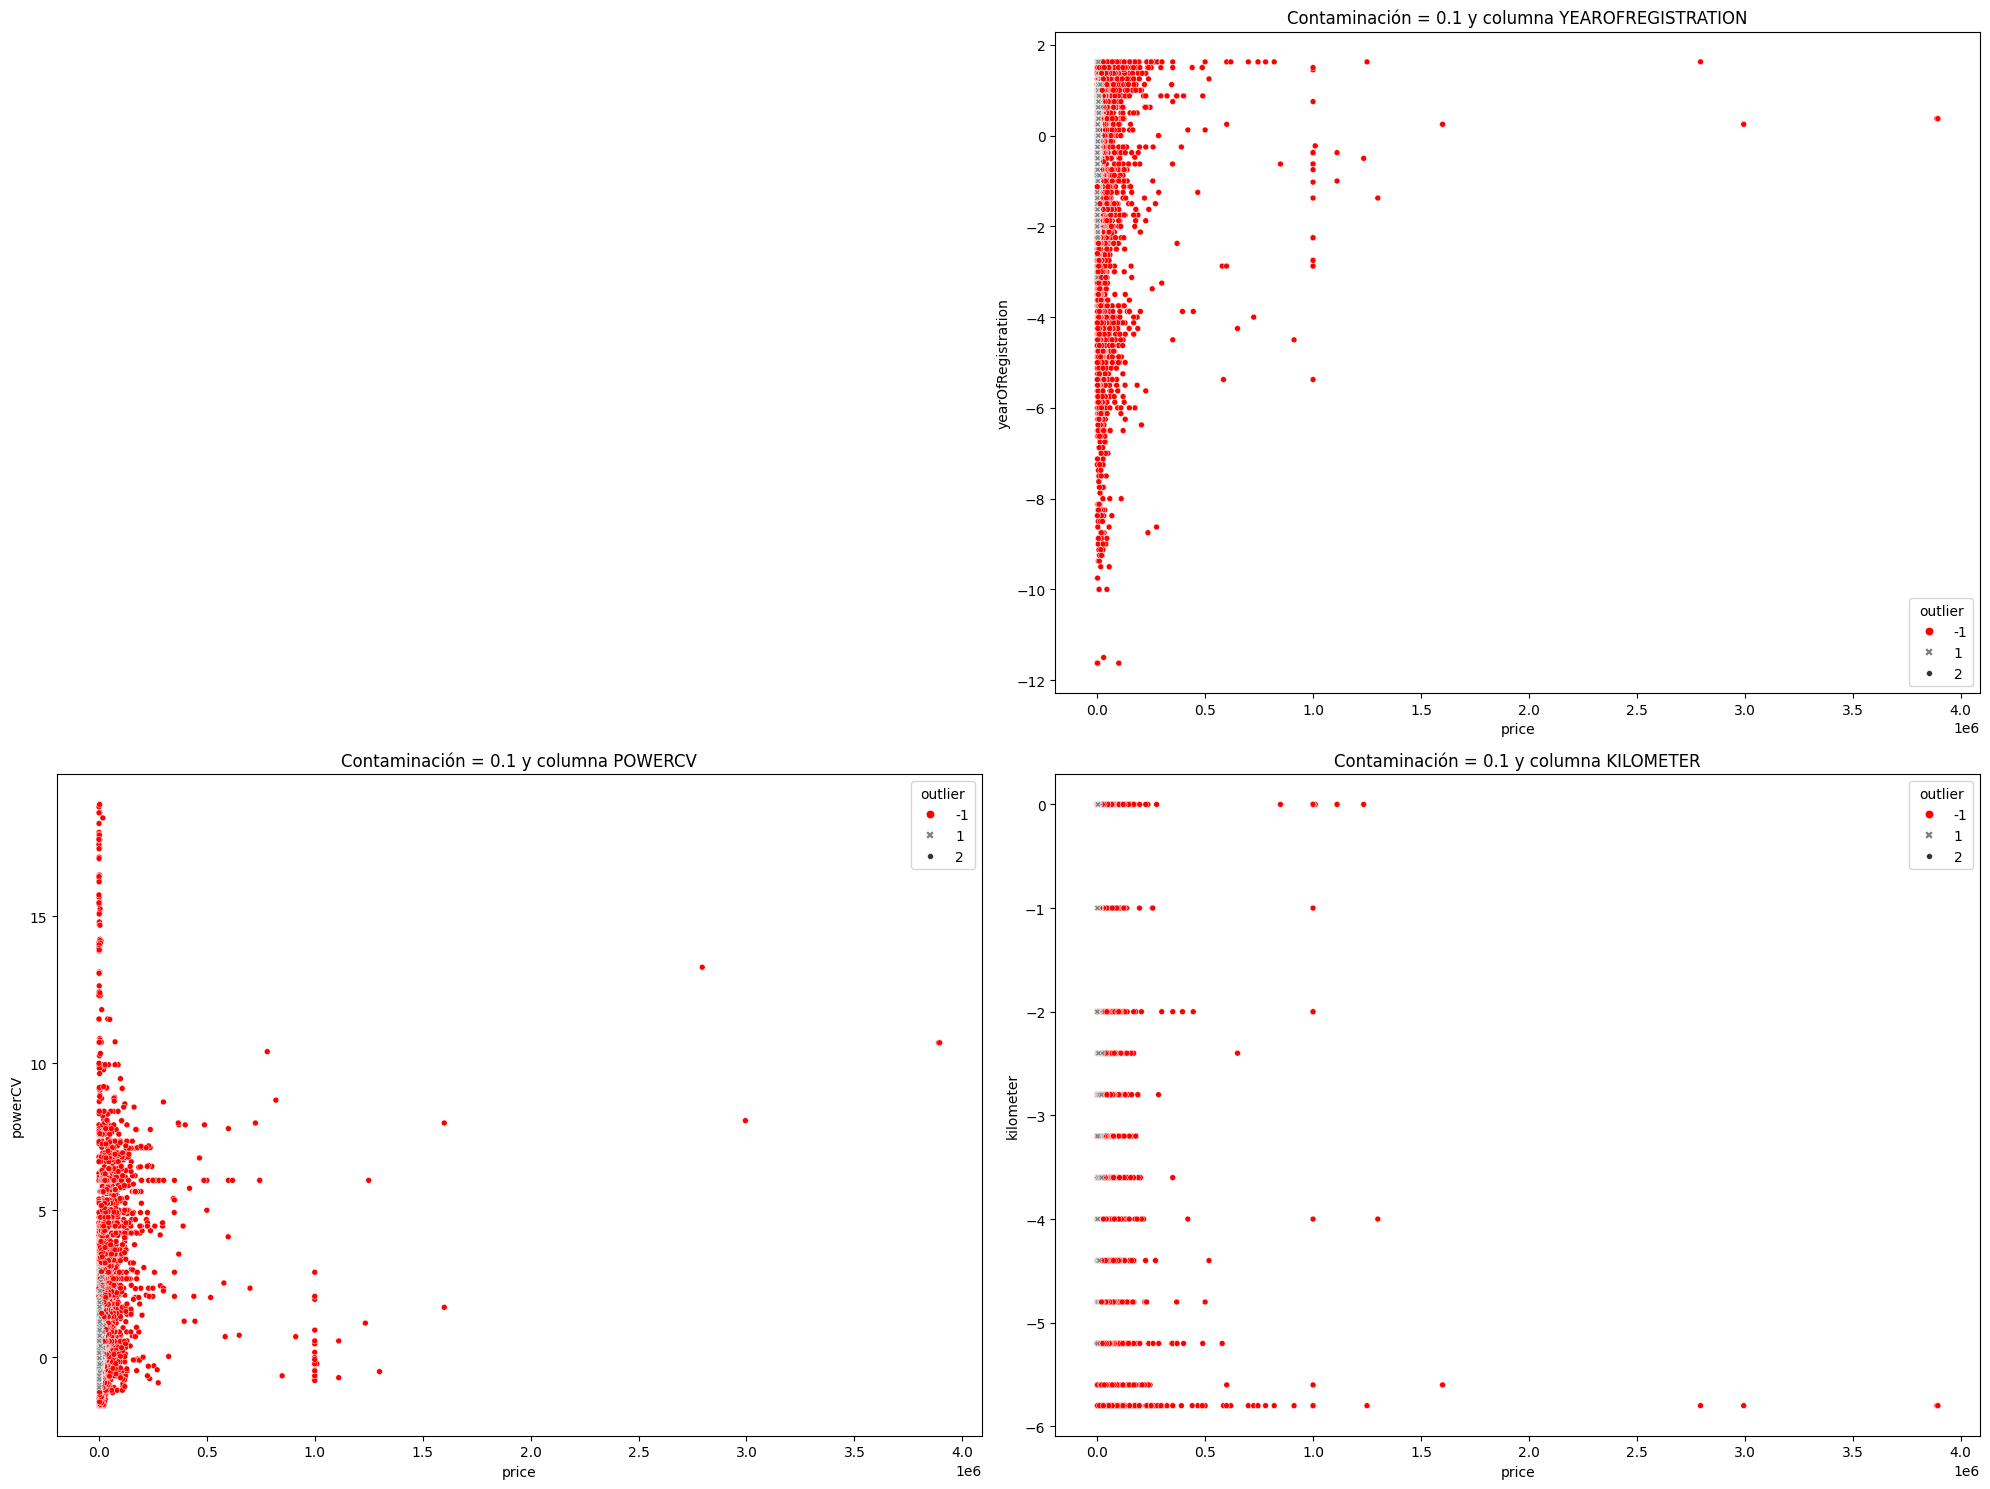

In [13]:
gestion_multi = GestionOutliersMultivariados(df)
gestion_multi.explorar_outliers_if("price", indice_contaminacion)

Vamos a quedarnos con un niver de contaminaci칩n de 0.01, ya que es capaz de captar los outliers sin penetrar demasiado en la estructura de los datos

In [14]:
df_outliers = gestion_multi.detectar_outliers_if(contaminacion=0.01)
df_outliers.head()

seller offerType    price abtest  vehicleType  yearOfRegistration  \
0  private     offer    480.0   test  desconocido              -1.250   
1  private     offer  18300.0   test        coupe               1.000   
2  private     offer   9800.0   test          suv               0.125   
3  private     offer   1500.0   test    small car              -0.250   
4  private     offer   3600.0   test    small car               0.625   

     gearbox   powerCV        model  kilometer monthOfRegistration fuelType  \
0   manually  0.333333         golf        0.0                 NaN   petrol   
1   manually  1.158730  desconocido       -1.0                 5.0   diesel   
2  automatic  0.746032        grand       -1.0                 8.0   diesel   
3   manually -0.634921         golf        0.0                 6.0   petrol   
4   manually -0.730159        fabia       -2.4                 7.0   diesel   

        brand notRepairedDamage  outlier  
0  volkswagen       desconocido        1  
1        audi               yes        1  
2        jeep       desconocido        1  
3  volkswagen                no        1  
4       skoda                no        1

In [15]:
df_outliers['outlier'].value_counts()

outlier
 1    331109
-1      3345
Name: count, dtype: int64

Vemos que efectivamente estar칤amos tratando como outliers el 1% de los registros, como indica el nivel de contaminaci칩n

Finalmente imputamos los valores por la mediana, aunque podr칤amos considerar descartarlos

In [16]:
df_final = gestion_multi.imputar_outliers(data = df_outliers, metodo = "mediana")
df_final.head()

seller offerType    price abtest  vehicleType  yearOfRegistration  \
0  private     offer    480.0   test  desconocido              -1.250   
1  private     offer  18300.0   test        coupe               1.000   
2  private     offer   9800.0   test          suv               0.125   
3  private     offer   1500.0   test    small car              -0.250   
4  private     offer   3600.0   test    small car               0.625   

     gearbox   powerCV        model  kilometer monthOfRegistration fuelType  \
0   manually  0.333333         golf        0.0                 NaN   petrol   
1   manually  1.158730  desconocido       -1.0                 5.0   diesel   
2  automatic  0.746032        grand       -1.0                 8.0   diesel   
3   manually -0.634921         golf        0.0                 6.0   petrol   
4   manually -0.730159        fabia       -2.4                 7.0   diesel   

        brand notRepairedDamage  
0  volkswagen       desconocido  
1        audi               yes  
2        jeep       desconocido  
3  volkswagen                no  
4       skoda                no

Guardamos el conjunto de datos

In [17]:
df_final.to_csv("datos/autorenew_knn_outliers.csv")

Nota: Conviene destacar que para un procedimiento m치s riguroso convendr칤a llevar a cabo un an치lisis de diferentes combinaciones de contaminaci칩n y vecinos en los algoritmos de outliers multivariados ya que la inspecci칩n visual en muchas ocasiones no es suficiente. Sin embargo, dejamos esto para futuros pasos y refinar el funcionamiento de nuestros modelos.